<a href="https://colab.research.google.com/github/SanjanaNayak166-commits/DataScience/blob/main/B2B_SaaS_Renewal_Likelihood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [109]:
data=pd.read_csv('b2b_saas_renewal_data.csv') #Dataset with labels & target column as renewal_status 1 or 0

In [110]:
data.head(5)

,CustomerID,Annual_Contract_Value_USD,Tenure_Months,Industry,Num_Licenses,Avg_Daily_Active_Users_Pct,Key_Feature_Adoption_Score,Support_Tickets_Opened_90Days,Avg_Resolution_Time_Hours_90Days,CSM_Touchpoints_90Days,NPS_Score_Last_Survey,Payment_Delays_Last_Year,Contract_Type,Renewal_Status
0,CUST_00001,83796,11,Healthcare,242,0.436450,0.405712,1,2.854544,1,-19.0,0,Annual,1
1,CUST_00002,246055,41,Other,450,0.131461,0.004428,2,5.916539,1,-1.0,0,Annual,1
2,CUST_00003,190665,17,Other,478,0.285132,0.582283,1,26.602638,1,-24.0,0,Annual,1
3,CUST_00004,446661,9,Tech,95,0.432219,0.752082,3,30.210735,0,27.0,0,Annual,1
4,CUST_00005,575088,22,Other,496,0.141315,0.451540,3,15.921864,1,43.0,0,Annual,1


In [111]:
data.shape # 20000 rows 14 columns

(20000, 14)

# **Metadata**

Dataset Features Explained:

**CustomerID**: Unique identifier for each customer account.

**Annual_Contract_Value_USD**: Annual revenue from the customer.

**Tenure_Months**: How long the customer has been with the company.

**Industry**: Categorical feature representing the customer's industry.

**Num_Licenses**: Number of seats or licenses the customer has.

**Avg_Daily_Active_Users_Pct**: Percentage of licensed users who are active daily (proxy for overall engagement).

**Key_Feature_Adoption_Score**: A score (0-1) indicating how well the customer has adopted and utilized key features of the product.

**Support_Tickets_Opened_90Days**: Number of support tickets opened in the last 90 days.

**Avg_Resolution_Time_Hours_90Days**: Average time taken to resolve their support tickets in the last 90 days.

**CSM_Touchpoints_90Days**: Number of proactive interactions by the Customer Success Manager.

**NPS_Score_Last_Survey**: Net Promoter Score from their last survey.

**Payment_Delays_Last_Year**: Number of times the customer had delayed payments in the last year.

**Contract_Type**: Type of contract (Monthly, Annual, Multi-Year).

**Renewal_Status**: This is your primary target variable. 1 if the customer renewed, 0 if they churned.

In a B2B SaaS company, the features used would typically be pulled from a combination of the following internal systems:

**1. Customer Relationship Management (CRM) System**
    (e.g., Salesforce, HubSpot, Zoho CRM, Microsoft Dynamics 365)

  This is the central hub for customer account information and interactions.


* Annual Contract Value (ACV) / Monthly Recurring Revenue (MRR):

    Directly from billing records linked to the CRM account.

* Tenure_Months: Calculated from the account "Created Date" or "Customer Since" field.
* Industry: Stored as a firmographic detail on the company record.

* Number of Licenses/Seats: Often linked to the contract details within the CRM or a connected billing system.

* Contract Type: Stored in the contract details.

* CSM Touchpoints: Logged activities (calls, emails, meetings, Quarterly Business Reviews (QBRs)) by the CSM with the customer account.

* Payment Delays: Can be pulled from integrated billing systems into the CRM, or explicitly logged by finance/CS.

* Customer ID: The primary key for the customer account.

**2. Product Analytics Platform**
(e.g., Mixpanel, Amplitude, Pendo, Heap, Google Analytics for B2B websites)

 These tools track how customers interact with your product. This is where you get engagement and usage metrics.

* Avg_Daily_Active_Users_Pct / Daily/Weekly/Monthly Active Users (DAU/WAU/MAU): Tracked through user logins and activity events.

* Key_Feature_Adoption_Score / Feature Usage Frequency/Depth: Defined by specific events (e.g., "report_generated," "integration_configured," "workflow_published"). The platform aggregates these events by user and account.

* Time Spent in Product / Average Session Duration: Captured by tracking session start/end times.

* Errors Generated: Often integrated with internal logging or error tracking systems (e.g., Sentry, New Relic) that can be linked to user sessions.

* API Usage Volume: If your product has an API, this data comes from your API gateway logs.

**3. Support Ticketing System / Help Desk Software**
(e.g., Zendesk, Salesforce Service Cloud, Intercom, HubSpot Service Hub)

  This system manages all customer support interactions.

* Support_Tickets_Opened_90Days / Ticket Volume: Number of tickets created by a specific customer account within a given timeframe.

* Avg_Resolution_Time_Hours_90Days: Calculated from Ticket Created Date and Ticket Resolved Date.

* Ticket Severity / Priority: Categorization assigned by the customer or support agent.

* Number of Agent Touches per Ticket: Count of internal responses/updates by agents on a ticket.

* Number of Escalations per Ticket: Flags for internal escalations.

**4. Customer Feedback / Survey Tools**
(e.g., Qualtrics, SurveyMonkey, In-app survey tools like Pendo, Userpilot, Medallia)

  These platforms collect direct customer feedback.

* NPS_Score_Last_Survey: From Net Promoter Score surveys.

* CSAT Score: From Customer Satisfaction surveys, usually triggered after an interaction.

* CES Score: From Customer Effort Score surveys.

**5. Billing & Finance System**
(e.g., Stripe, Chargebee, Zuora, Internal ERP)

  While often integrated with CRM, some specific financial details might reside here.

* Payment Delays_Last_Year: Derived from payment transaction statuses (e.g., "overdue," "failed").

* Specific Billing Plan Details: Tier, add-ons.

**1. Problem Statement:**

Our B2B SaaS company faces a significant challenge in proactively identifying customer accounts at risk of churn before their renewal date. Our Customer Success Managers (CSMs) currently rely heavily on qualitative assessments and reactive signals (e.g., missed payments, explicit cancellation requests), leading to last-minute interventions that are often less effective. This reactive approach contributes to preventable customer churn and impacts our Net Revenue Retention (NRR) and overall recurring revenue stability.

**2. Stakeholders:**

Primary Stakeholders (Directly Impacted & Involved):

Head of Customer Success (or VP/Director of CS): Owns churn reduction, customer retention, and CSM team performance. They will be the primary user of the model's insights.

Customer Success Managers (CSMs): Will use the renewal likelihood scores to prioritize their accounts and tailor their engagement strategies.

Head of Product: Needs to understand which product usage patterns (or lack thereof) correlate with churn risk to inform product development and improvements.

Head of Sales: Benefits from understanding churn drivers to refine customer acquisition strategies and improve ideal customer profile (ICP) targeting.

Finance Department / CFO: Concerned with recurring revenue stability, NRR, and predictable revenue forecasting.

Secondary Stakeholders (Indirectly Impacted):

Marketing Department: Can use insights to refine messaging and customer education.

Executive Leadership (CEO/COO): Overall business health and growth.

Support Team Leads: Can understand if certain customer segments consistently require more support, indicating potential friction points.

**3. Desired Outcome:**

To develop and deploy a predictive machine learning model that generates a Renewal Likelihood Score for each customer account. This score will enable our Customer Success team to proactively identify high-risk accounts well in advance of their renewal date, allowing for timely, targeted interventions and personalized support strategies. Ultimately, this will lead to a quantifiable reduction in preventable churn and an improvement in our Net Revenue Retention.

# **STEP 1. EXPLORATORY DATA ANALYSIS**

In [112]:
print("\n--- First 5 rows of the dataset ---")
data.head()


--- First 5 rows of the dataset ---


,CustomerID,Annual_Contract_Value_USD,Tenure_Months,Industry,Num_Licenses,Avg_Daily_Active_Users_Pct,Key_Feature_Adoption_Score,Support_Tickets_Opened_90Days,Avg_Resolution_Time_Hours_90Days,CSM_Touchpoints_90Days,NPS_Score_Last_Survey,Payment_Delays_Last_Year,Contract_Type,Renewal_Status
0,CUST_00001,83796,11,Healthcare,242,0.436450,0.405712,1,2.854544,1,-19.0,0,Annual,1
1,CUST_00002,246055,41,Other,450,0.131461,0.004428,2,5.916539,1,-1.0,0,Annual,1
2,CUST_00003,190665,17,Other,478,0.285132,0.582283,1,26.602638,1,-24.0,0,Annual,1
3,CUST_00004,446661,9,Tech,95,0.432219,0.752082,3,30.210735,0,27.0,0,Annual,1
4,CUST_00005,575088,22,Other,496,0.141315,0.451540,3,15.921864,1,43.0,0,Annual,1


In [113]:
# Display basic information
print("\n--- Basic Dataset Information ---")
data.info()


--- Basic Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CustomerID                        20000 non-null  object 
 1   Annual_Contract_Value_USD         20000 non-null  int64  
 2   Tenure_Months                     20000 non-null  int64  
 3   Industry                          20000 non-null  object 
 4   Num_Licenses                      20000 non-null  int64  
 5   Avg_Daily_Active_Users_Pct        20000 non-null  float64
 6   Key_Feature_Adoption_Score        20000 non-null  float64
 7   Support_Tickets_Opened_90Days     20000 non-null  int64  
 8   Avg_Resolution_Time_Hours_90Days  20000 non-null  float64
 9   CSM_Touchpoints_90Days            20000 non-null  int64  
 10  NPS_Score_Last_Survey             18000 non-null  float64
 11  Payment_Delays_Last_Year        

In [114]:
print("\n--- Descriptive Statistics for Numerical Features ---")
data.describe()


--- Descriptive Statistics for Numerical Features ---


,Annual_Contract_Value_USD,Tenure_Months,Num_Licenses,Avg_Daily_Active_Users_Pct,Key_Feature_Adoption_Score,Support_Tickets_Opened_90Days,Avg_Resolution_Time_Hours_90Days,CSM_Touchpoints_90Days,NPS_Score_Last_Survey,Payment_Delays_Last_Year,Renewal_Status
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,18000.000000,20000.000000,20000.000000
mean,2.934373e+05,23.943750,228.273950,0.549962,0.500881,1.48185,24.988412,0.802200,-0.653944,0.293250,0.940300
std,3.628507e+05,13.595909,151.419031,0.259565,0.288876,1.22137,13.235513,0.898396,57.542938,0.541728,0.236936
min,3.665000e+03,1.000000,5.000000,0.100013,0.000002,0.00000,2.001365,0.000000,-100.000000,0.000000,0.000000
25%,9.229600e+04,12.000000,85.000000,0.323593,0.253119,1.00000,13.541579,0.000000,-50.000000,0.000000,1.000000
50%,1.792275e+05,24.000000,224.000000,0.553891,0.501209,1.00000,25.027275,1.000000,0.000000,0.000000,1.000000
75%,3.520070e+05,36.000000,360.000000,0.771205,0.749548,2.00000,36.445114,1.000000,48.000000,1.000000,1.000000
max,5.239036e+06,47.000000,499.000000,0.999925,0.999905,8.00000,47.995534,7.000000,99.000000,4.000000,1.000000


In [115]:
print("\n--- Missing Values Check ---")
data.isnull().sum()


--- Missing Values Check ---


,0
CustomerID,0
Annual_Contract_Value_USD,0
Tenure_Months,0
Industry,0
Num_Licenses,0
Avg_Daily_Active_Users_Pct,0
Key_Feature_Adoption_Score,0
Support_Tickets_Opened_90Days,0
Avg_Resolution_Time_Hours_90Days,0
CSM_Touchpoints_90Days,0


There is currrently 2000 missing data points in NPS_Score_Last_Surevy which we will handle during data preprocessing step.

In [116]:
# Target Variable Analysis: Renewal_Status
print("\n--- Target Variable Distribution: Renewal_Status ---")
renewal_counts = data['Renewal_Status'].value_counts()
print("Renewal Status Counts:")
print(renewal_counts)


--- Target Variable Distribution: Renewal_Status ---
Renewal Status Counts:
Renewal_Status
1    18806
0     1194
Name: count, dtype: int64


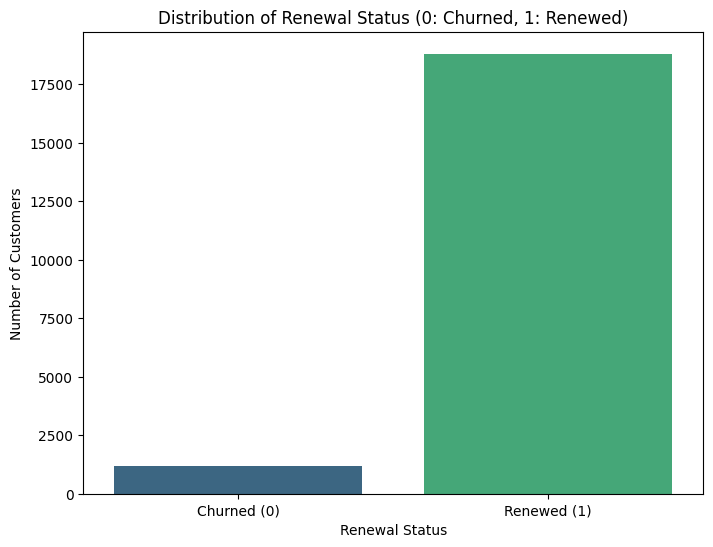

In [117]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Renewal_Status', data=data, palette='viridis')
plt.title('Distribution of Renewal Status (0: Churned, 1: Renewed)')
plt.xlabel('Renewal Status')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['Churned (0)', 'Renewed (1)'])
plt.show()

In [118]:
renewal_proportions = data['Renewal_Status'].value_counts(normalize=True)
print("\nRenewal Status Proportions:")
print(renewal_proportions)
if renewal_proportions[0] > 0.3 or renewal_proportions[1] > 0.7: # Example threshold for imbalance
    print("\n--- Imbalance Warning ---")
    print("The dataset shows some class imbalance. This should be considered during model training (e.g., using stratification, class weighting, or imbalanced learning techniques).")
else:
  print("\n--- Balanced Dataset ---")


Renewal Status Proportions:
Renewal_Status
1    0.9403
0    0.0597
Name: proportion, dtype: float64

--- Imbalance Warning ---
The dataset shows some class imbalance. This should be considered during model training (e.g., using stratification, class weighting, or imbalanced learning techniques).


In [119]:
# Separate features (X) and target (y)
# Drop CustomerID and the theoretical probability, and Renewal_Status (which is our y)
X = data.drop(['CustomerID', 'Renewal_Status'], axis=1)
y = data['Renewal_Status']


In [120]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns



--- Numerical Feature Distributions & Outlier Check ---


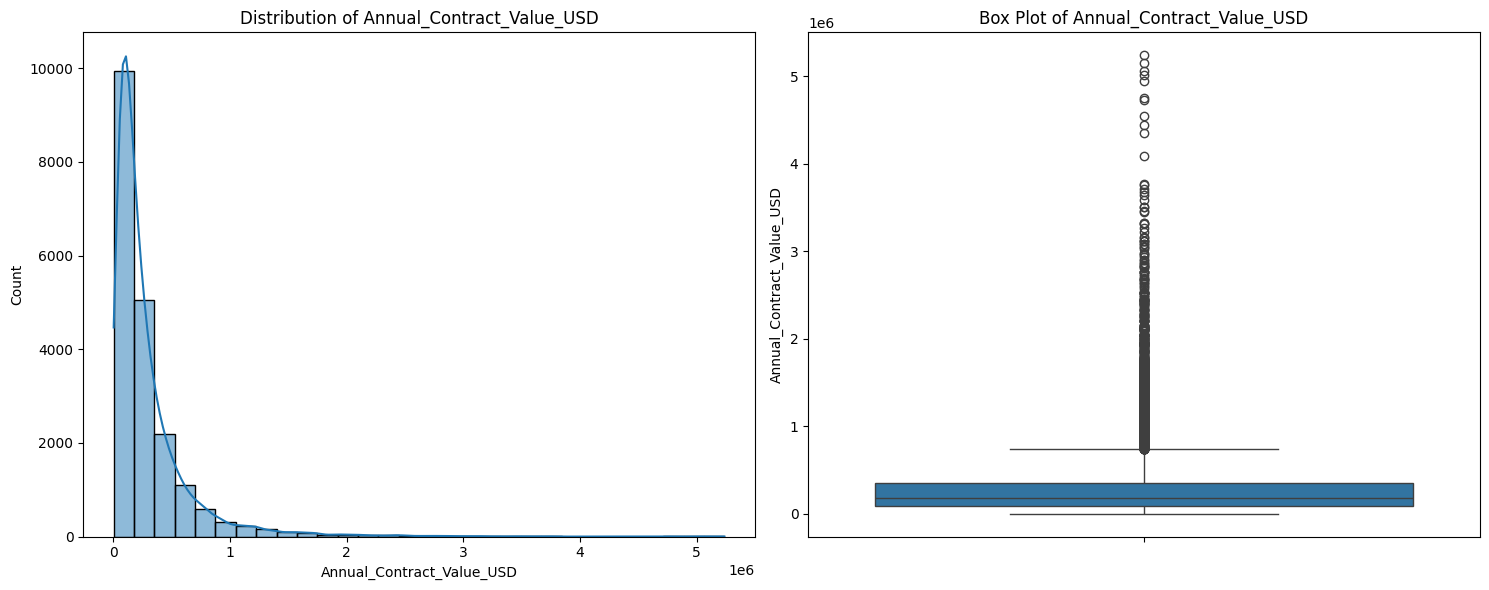

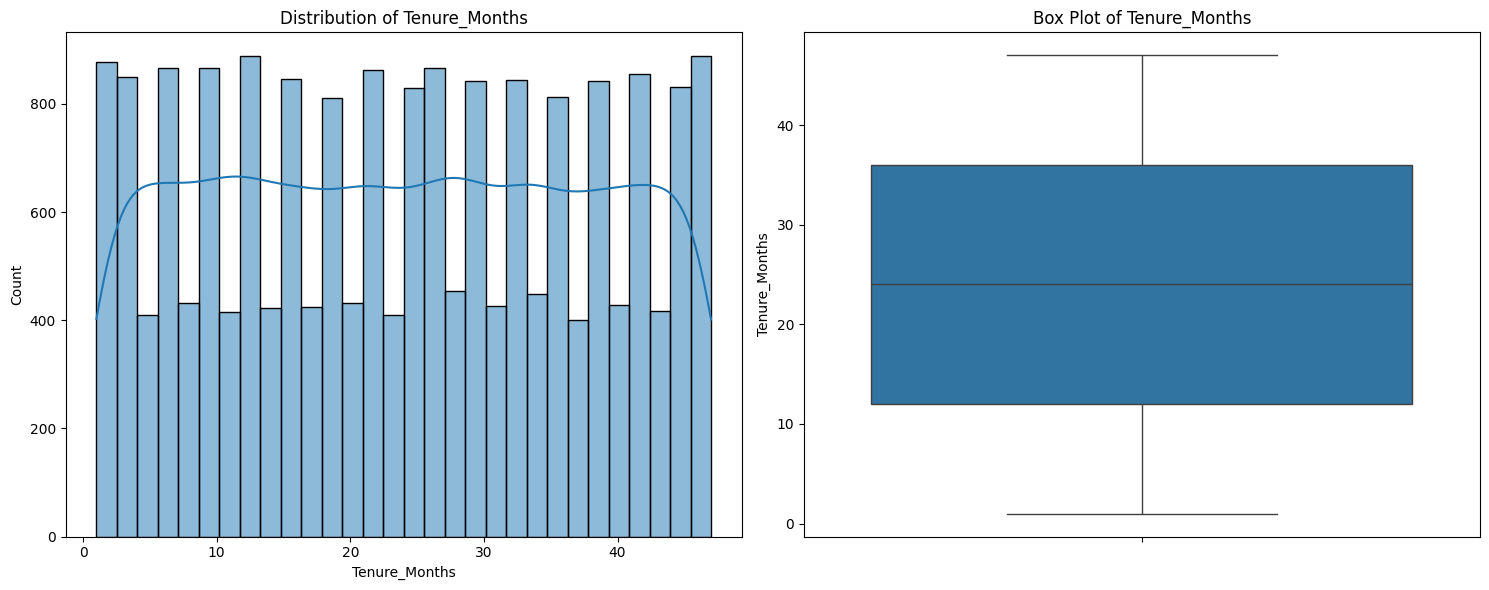

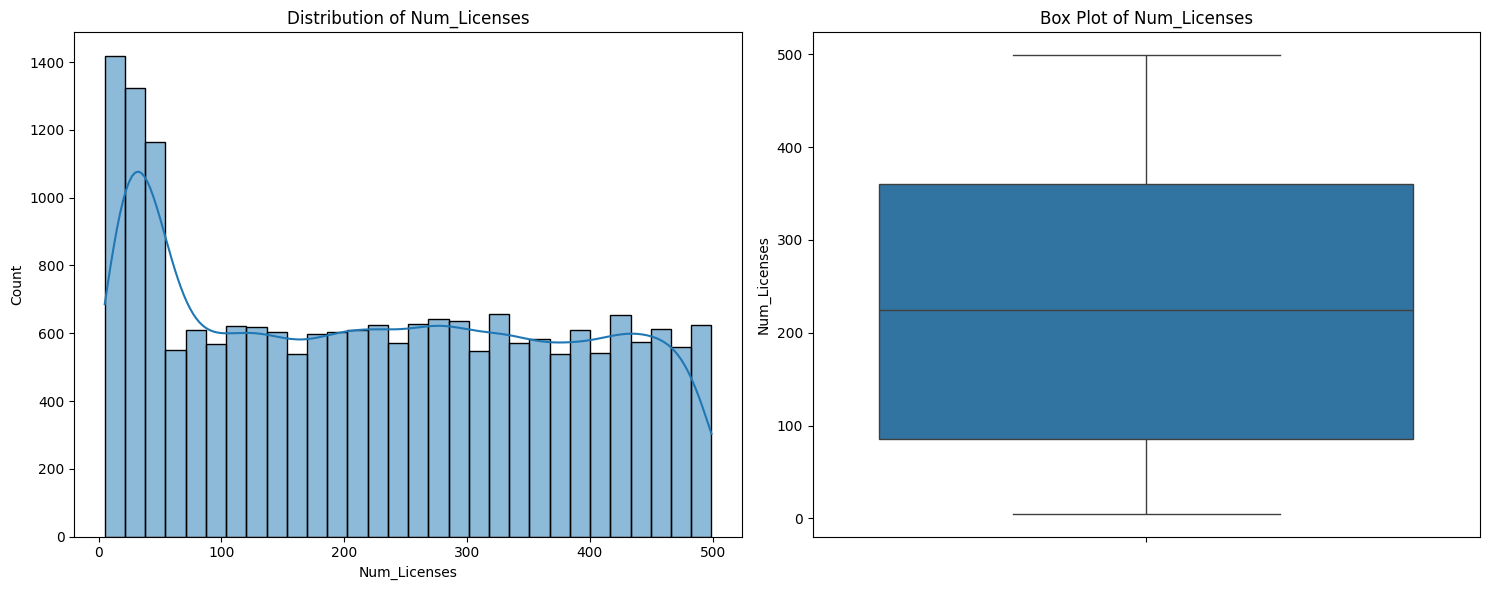

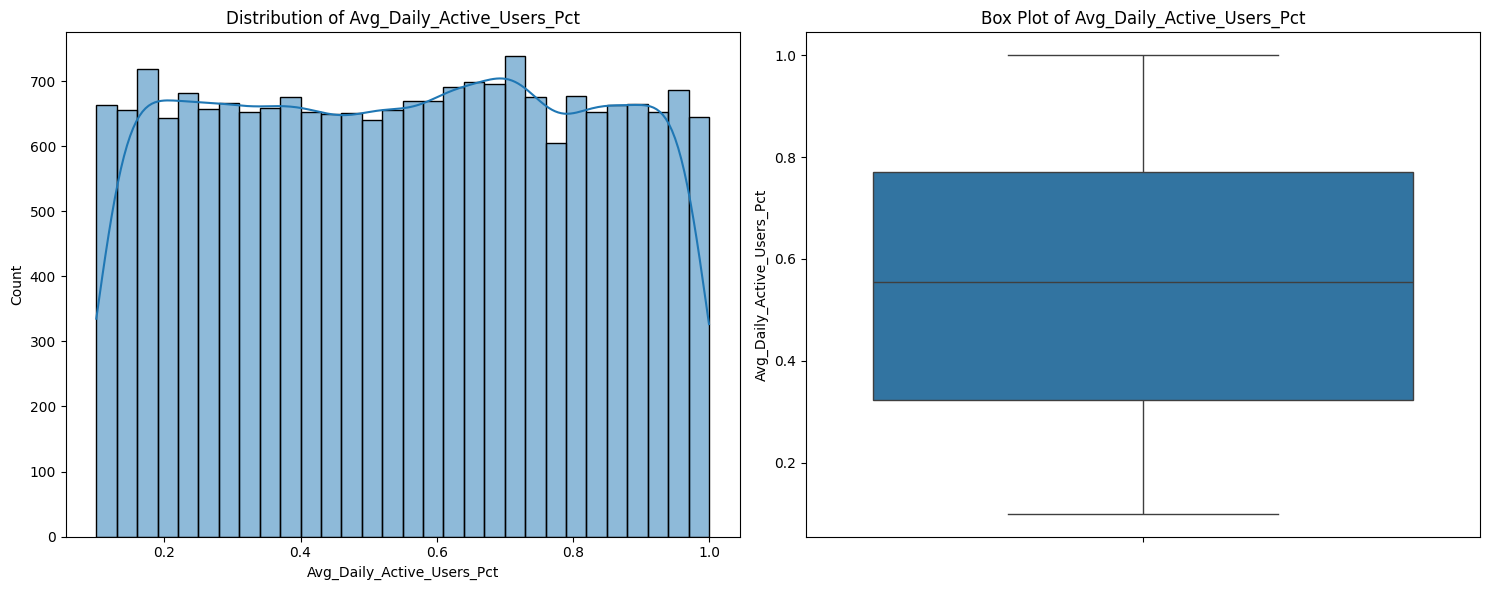

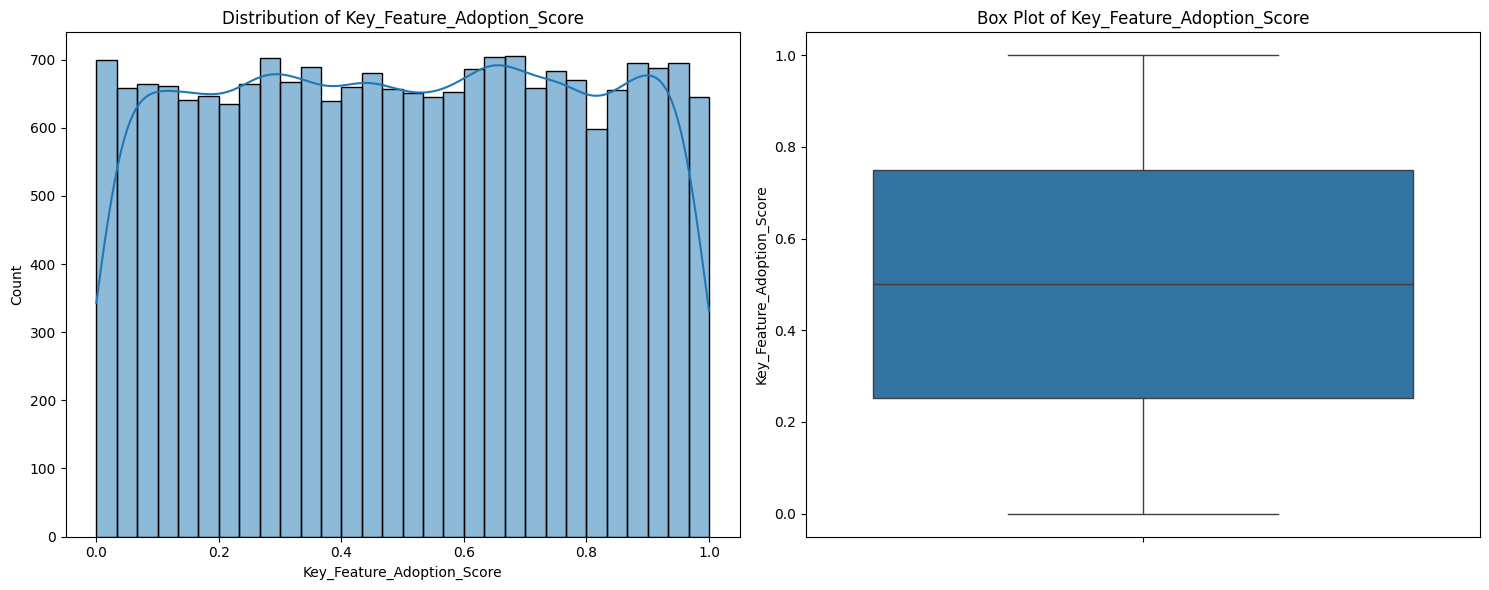

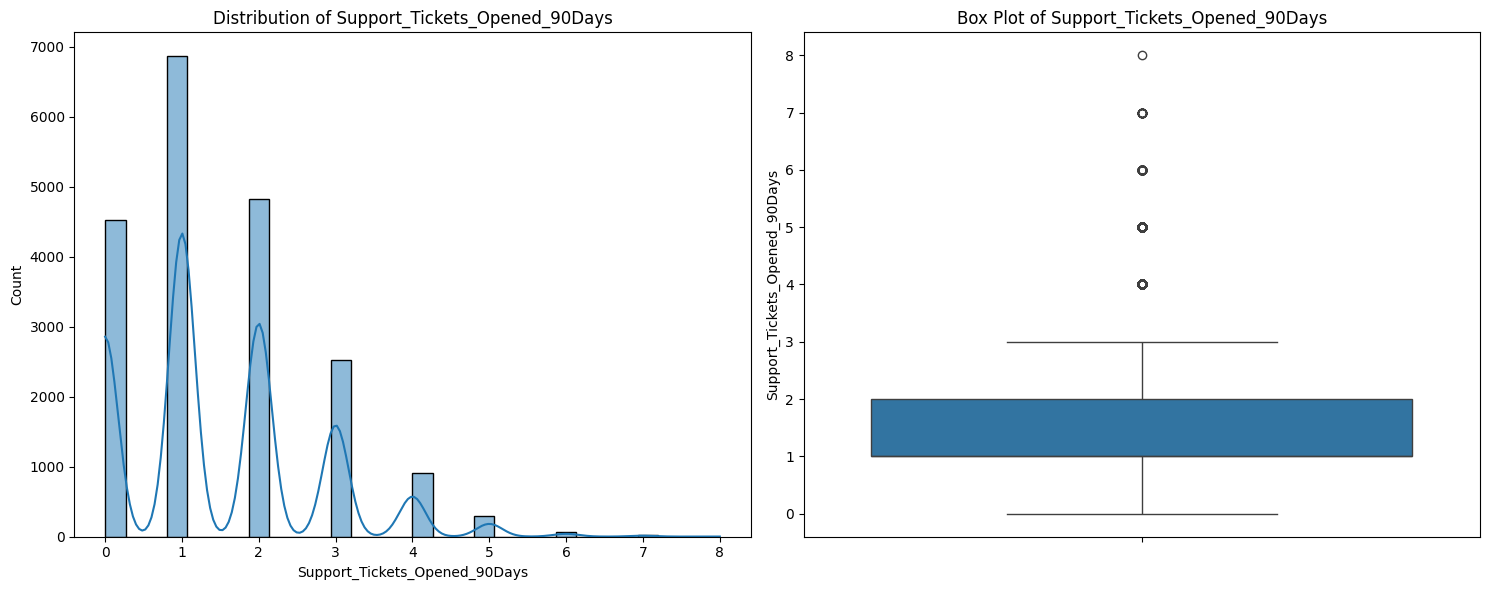

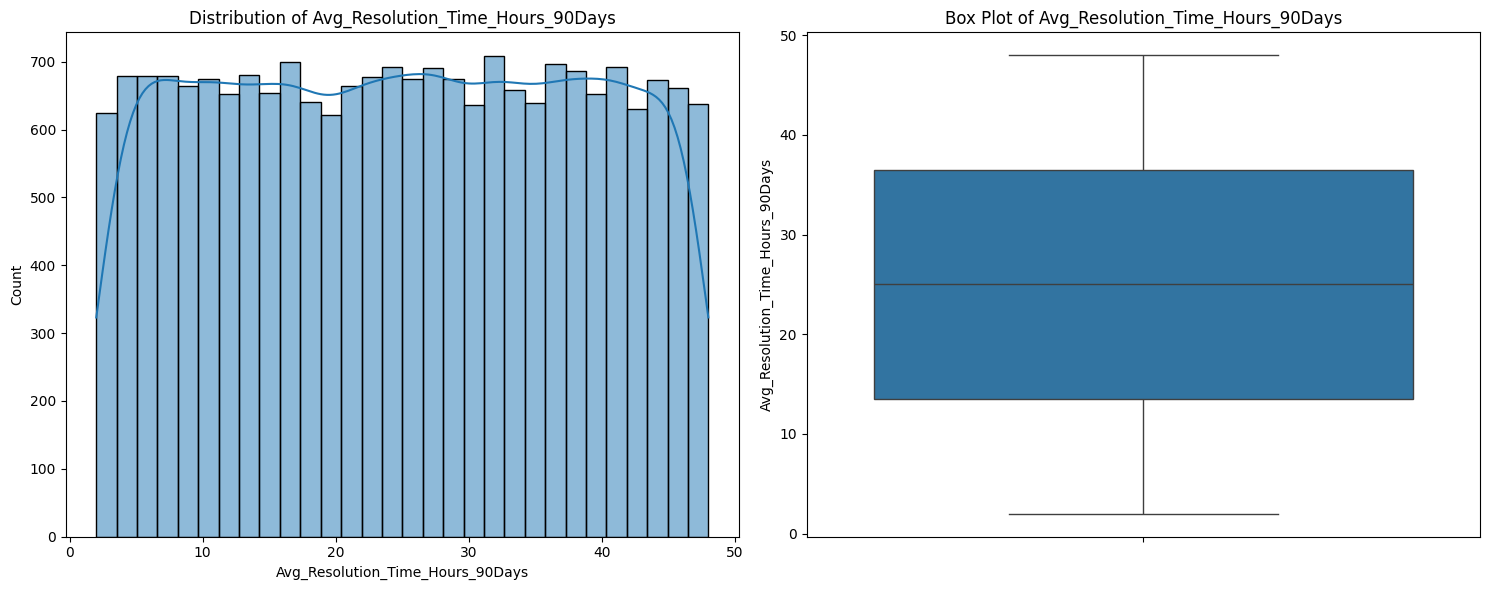

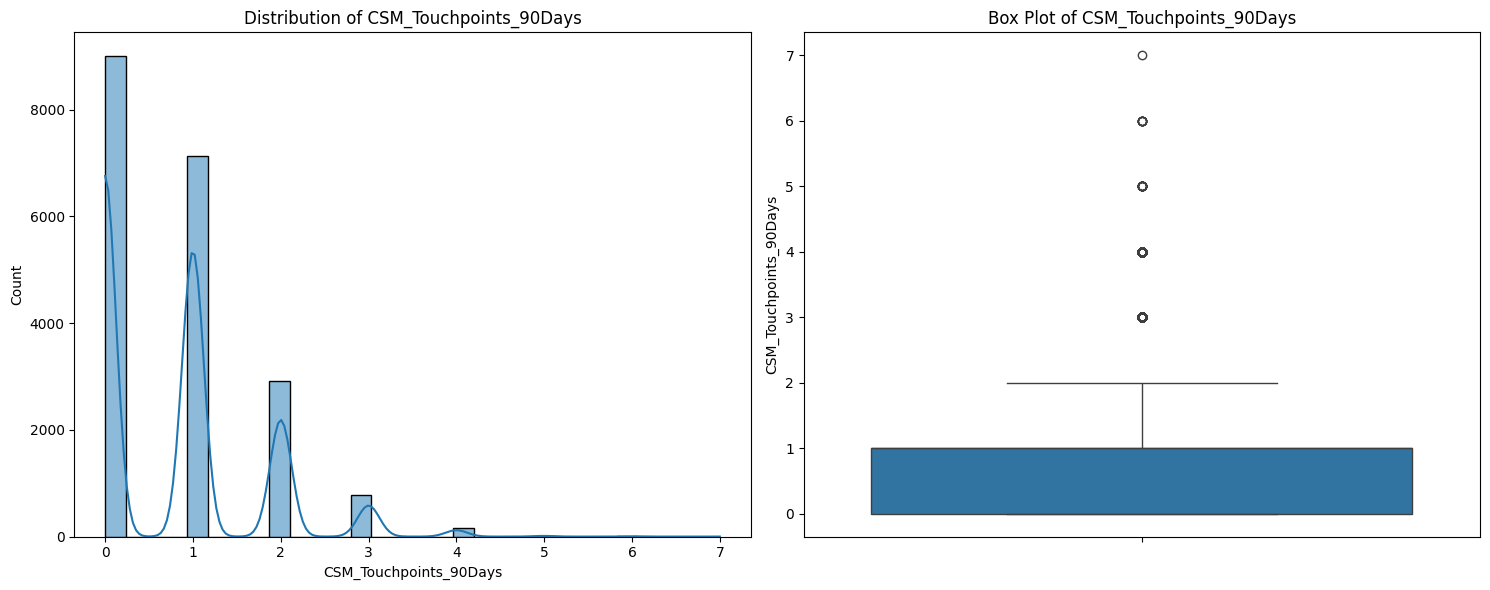

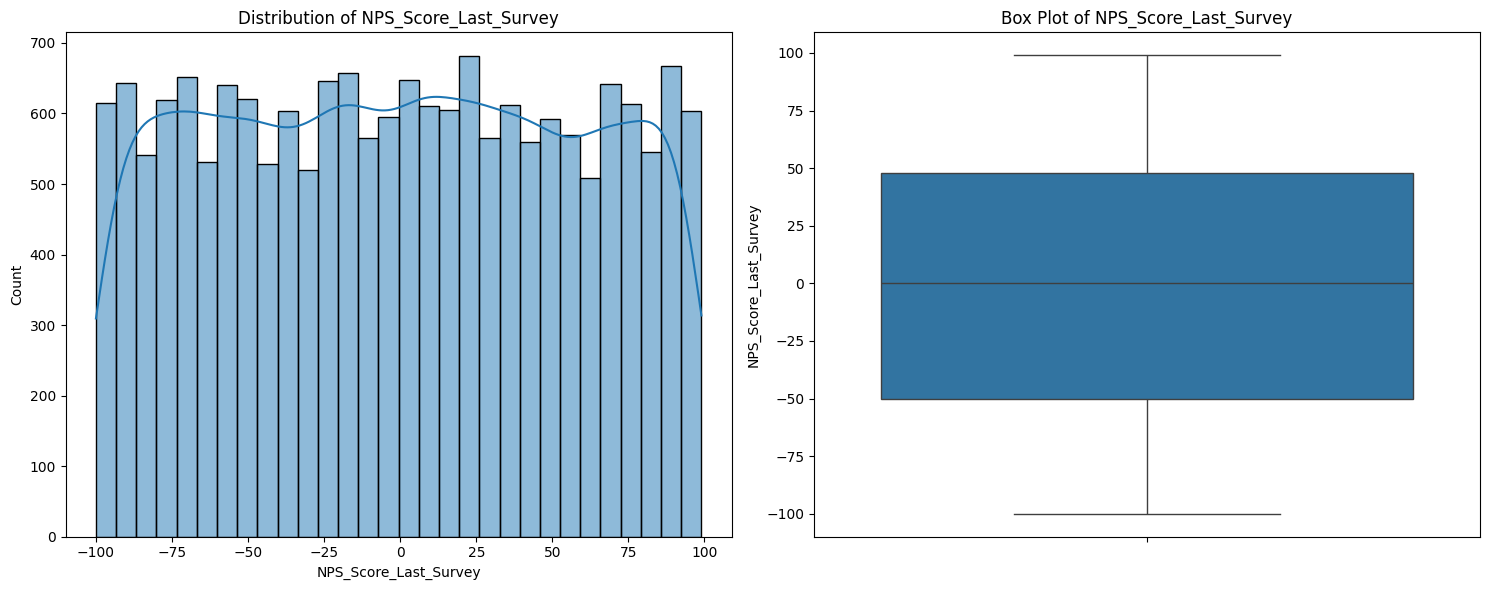

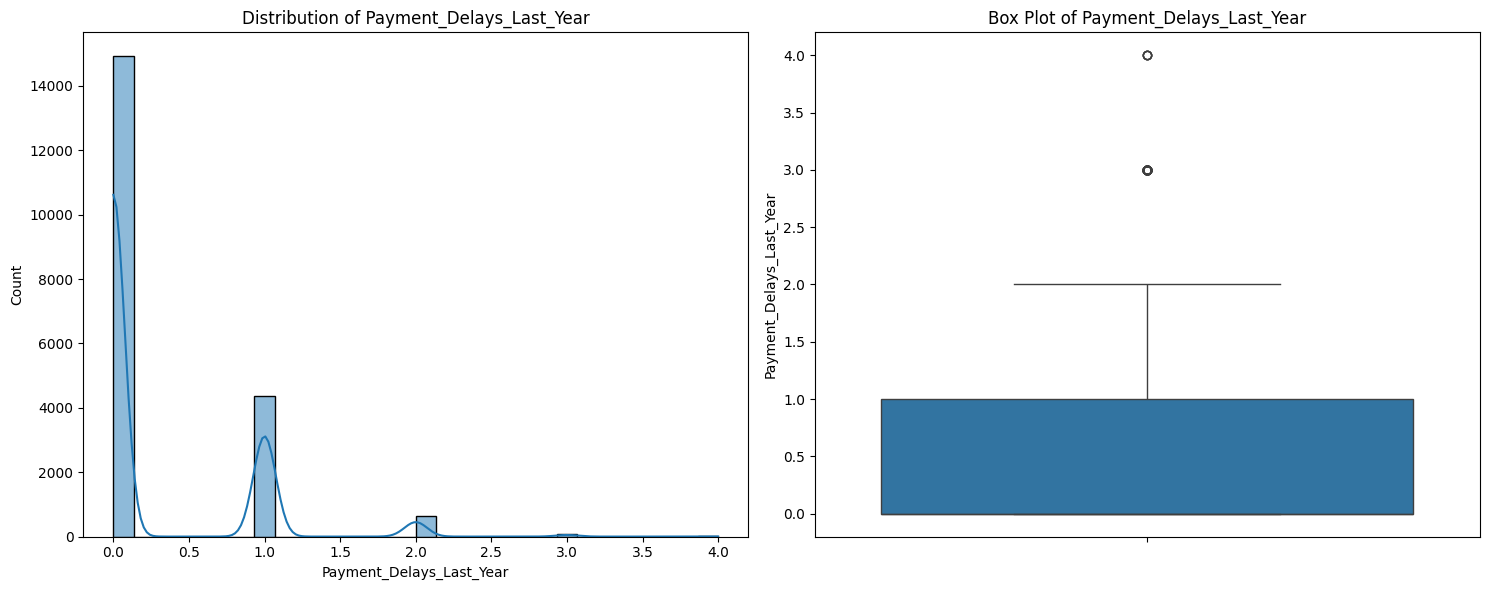


--- Numerical Feature vs. Renewal Status (Box Plots) ---


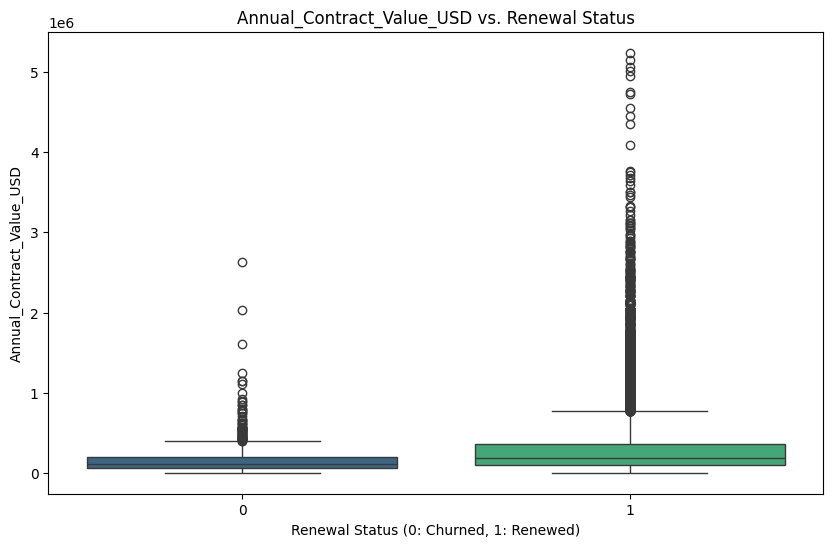

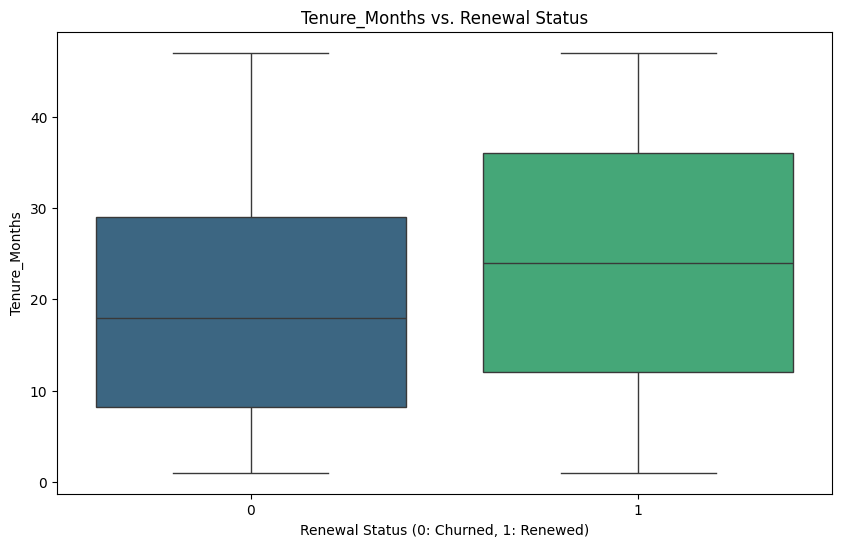

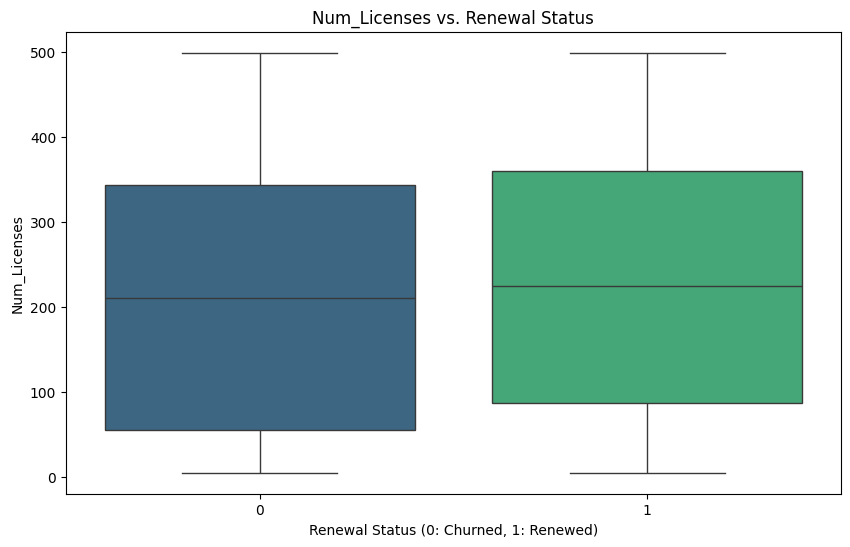

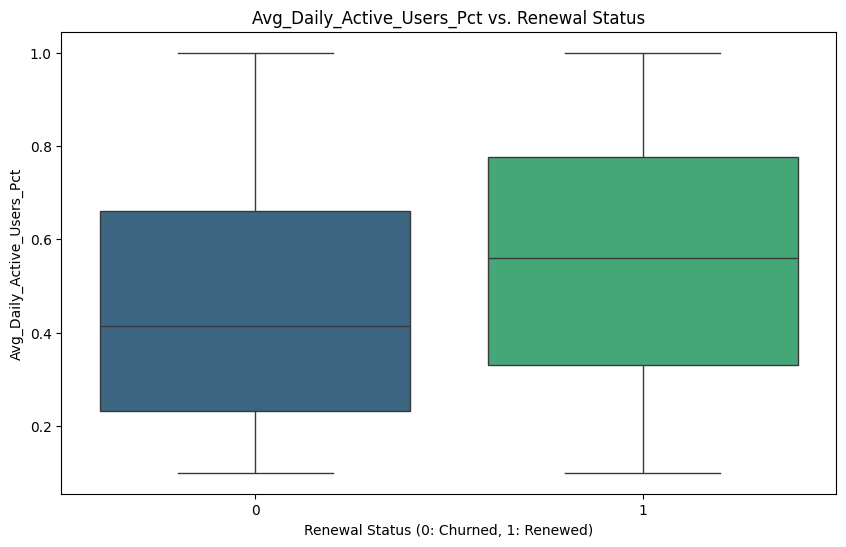

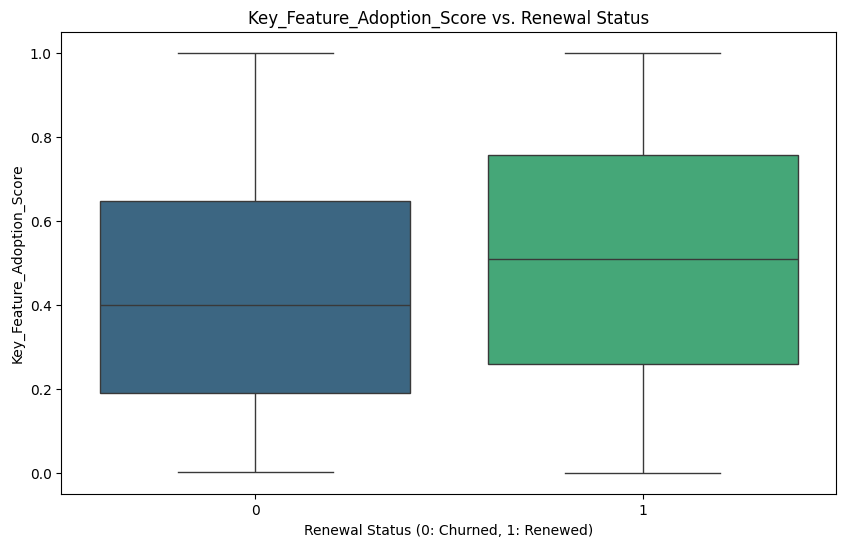

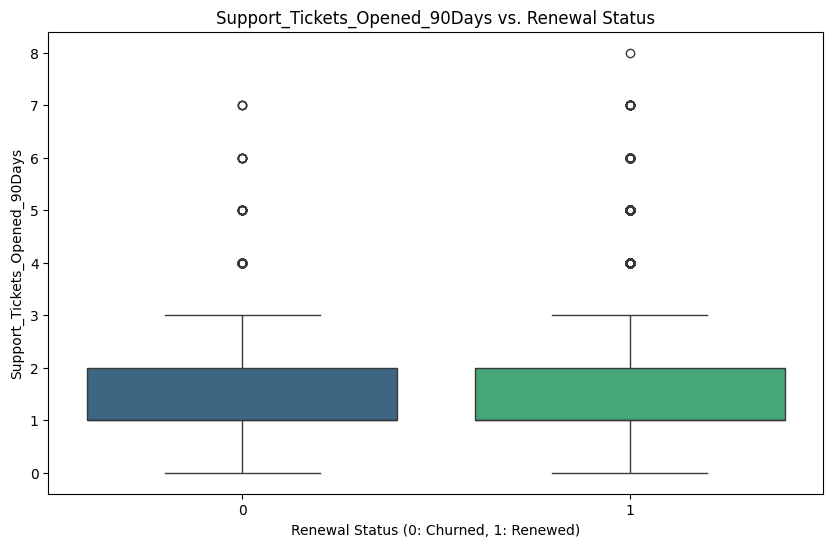

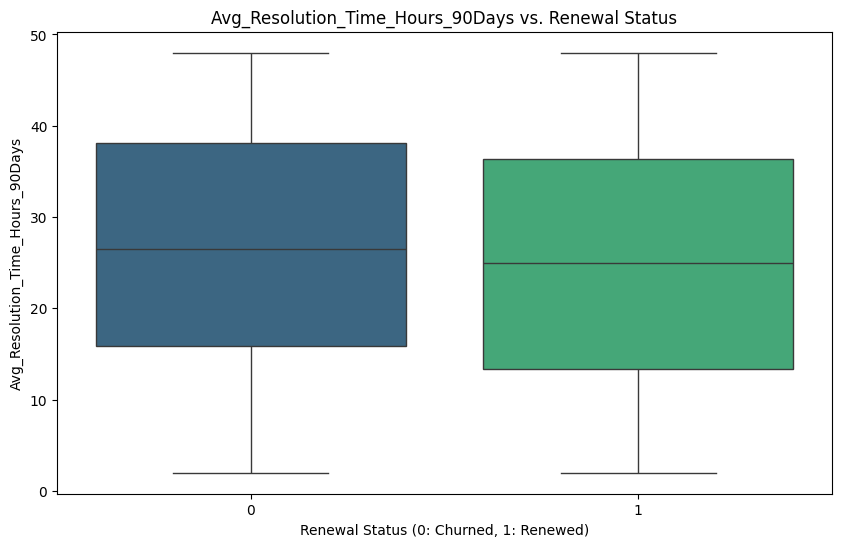

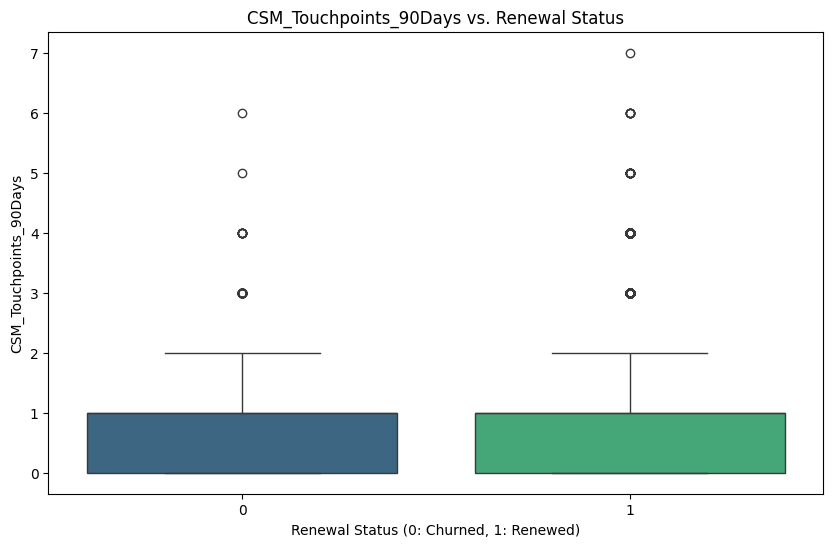

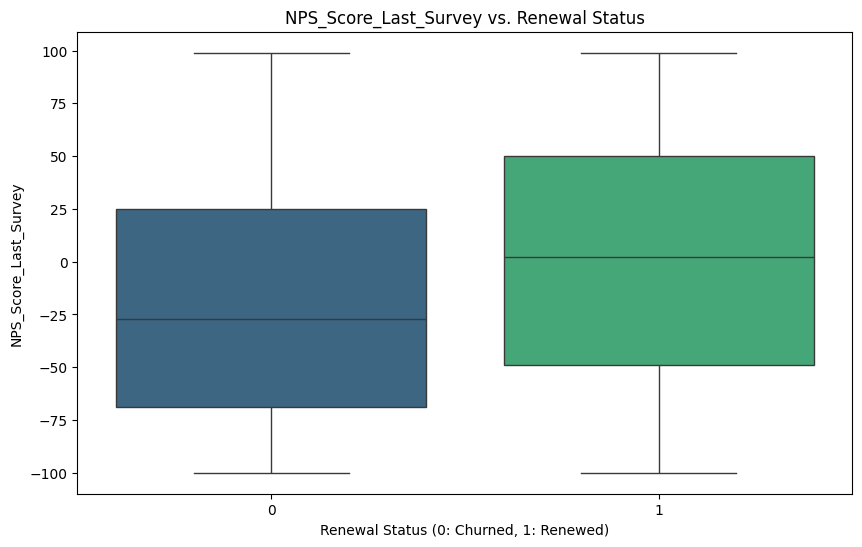

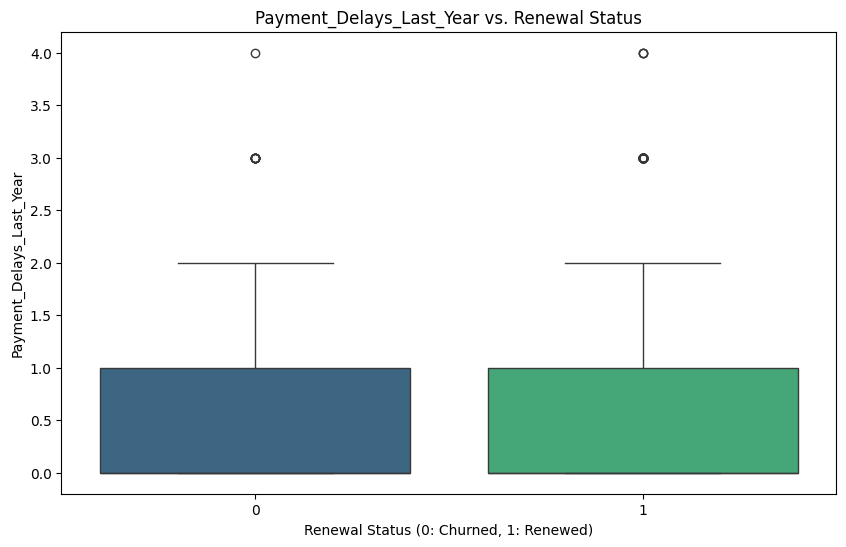

In [121]:
# Numerical Features Analysis

print("\n--- Numerical Feature Distributions & Outlier Check ---")
for col in numerical_features:
    plt.figure(figsize=(15, 6))

    # Histogram/KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Box Plot for Outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

print("\n--- Numerical Feature vs. Renewal Status (Box Plots) ---")
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Renewal_Status', y=col, data=data, palette='viridis')
    plt.title(f'{col} vs. Renewal Status')
    plt.xlabel('Renewal Status (0: Churned, 1: Renewed)')
    plt.ylabel(col)
    plt.show()

**Insights from Numerical Features:**

* Annual_Contract_Value_USD: Likely skewed right (log-normal distribution
as per generation script). Box plot will show outliers (large contracts). Expect higher ACV to correlate with higher renewal likelihood.

* Tenure_Months: Should be relatively uniform or slightly right-skewed. Expect longer tenure to correlate with higher renewal likelihood.

* Num_Licenses: Similar distribution to ACV, potentially with outliers for very large accounts. Expect more licenses to correlate with higher renewal likelihood.

* Avg_Daily_Active_Users_Pct & Key_Feature_Adoption_Score: Should be between 0 and 1. Expect higher values to correlate with higher renewal likelihood. These are crucial engagement metrics.

* Support_Tickets_Opened_90Days: Poisson distribution, skewed right with a tail for customers opening many tickets. Expect more tickets to correlate with lower renewal likelihood (potential friction).

* Avg_Resolution_Time_Hours_90Days: May vary. Expect longer resolution times to correlate with lower renewal likelihood.

* CSM_Touchpoints_90Days: Poisson distribution, skewed right. Expect more CSM touches to correlate with higher renewal likelihood (positive engagement), unless too many touches indicate a problem.

* NPS_Score_Last_Survey: Wide range (-100 to 100). Will have NaNs. Expect higher NPS to correlate with higher renewal likelihood.

* Payment_Delays_Last_Year: Poisson distribution, mostly zeros or small counts. Expect more payment delays to correlate with lower renewal likelihood.

**Outlier Handling (Post-EDA Consideration):**

* For skewed data (like ACV, Num_Licenses, Support_Tickets), consider log transformations or robust scaling during preprocessing if using models sensitive to outliers.

* Decide if outliers represent true extreme values or data entry errors.

In [122]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()



print("Applying outlier capping using IQR for numerical features:")
print(numerical_features)

# Apply IQR-based capping
for col in numerical_features:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the values
    X[col] = X[col].clip(lower=lower_bound, upper=upper_bound)

print("\n--- Data after Outlier Capping ---")
# Display descriptive statistics to see the effect of capping
display(X[numerical_features].describe())

Applying outlier capping using IQR for numerical features:
['Annual_Contract_Value_USD', 'Tenure_Months', 'Num_Licenses', 'Avg_Daily_Active_Users_Pct', 'Key_Feature_Adoption_Score', 'Support_Tickets_Opened_90Days', 'Avg_Resolution_Time_Hours_90Days', 'CSM_Touchpoints_90Days', 'NPS_Score_Last_Survey', 'Payment_Delays_Last_Year']

--- Data after Outlier Capping ---


,Annual_Contract_Value_USD,Tenure_Months,Num_Licenses,Avg_Daily_Active_Users_Pct,Key_Feature_Adoption_Score,Support_Tickets_Opened_90Days,Avg_Resolution_Time_Hours_90Days,CSM_Touchpoints_90Days,NPS_Score_Last_Survey,Payment_Delays_Last_Year
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,18000.000000,20000.000000
mean,253596.491350,23.943750,228.273950,0.549962,0.500881,1.426225,24.988412,0.767350,-0.653944,0.291225
std,212099.063143,13.595909,151.419031,0.259565,0.288876,1.089899,13.235513,0.805842,57.542938,0.532179
min,3665.000000,1.000000,5.000000,0.100013,0.000002,0.000000,2.001365,0.000000,-100.000000,0.000000
25%,92296.000000,12.000000,85.000000,0.323593,0.253119,1.000000,13.541579,0.000000,-50.000000,0.000000
50%,179227.500000,24.000000,224.000000,0.553891,0.501209,1.000000,25.027275,1.000000,0.000000,0.000000
75%,352007.000000,36.000000,360.000000,0.771205,0.749548,2.000000,36.445114,1.000000,48.000000,1.000000
max,741573.500000,47.000000,499.000000,0.999925,0.999905,3.500000,47.995534,2.500000,99.000000,2.500000



--- Categorical Feature Distributions ---


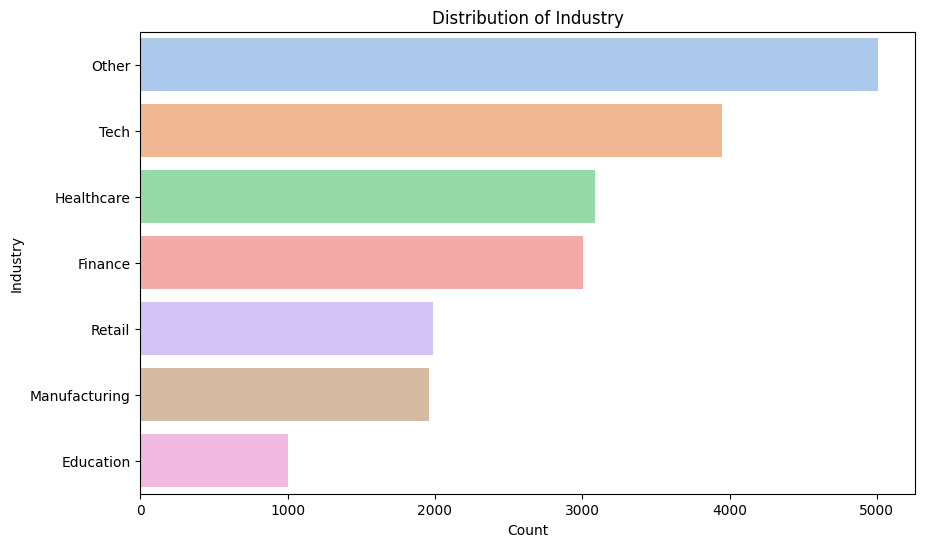

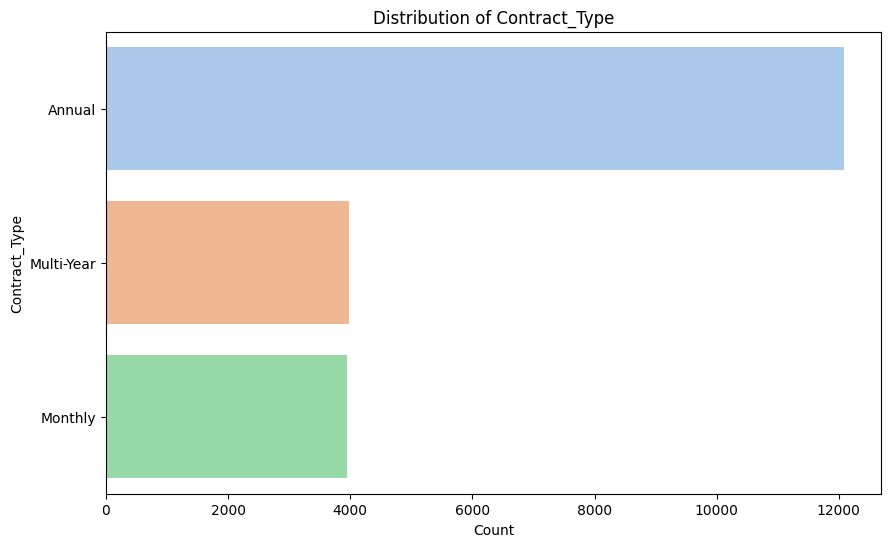


--- Categorical Feature vs. Renewal Status ---


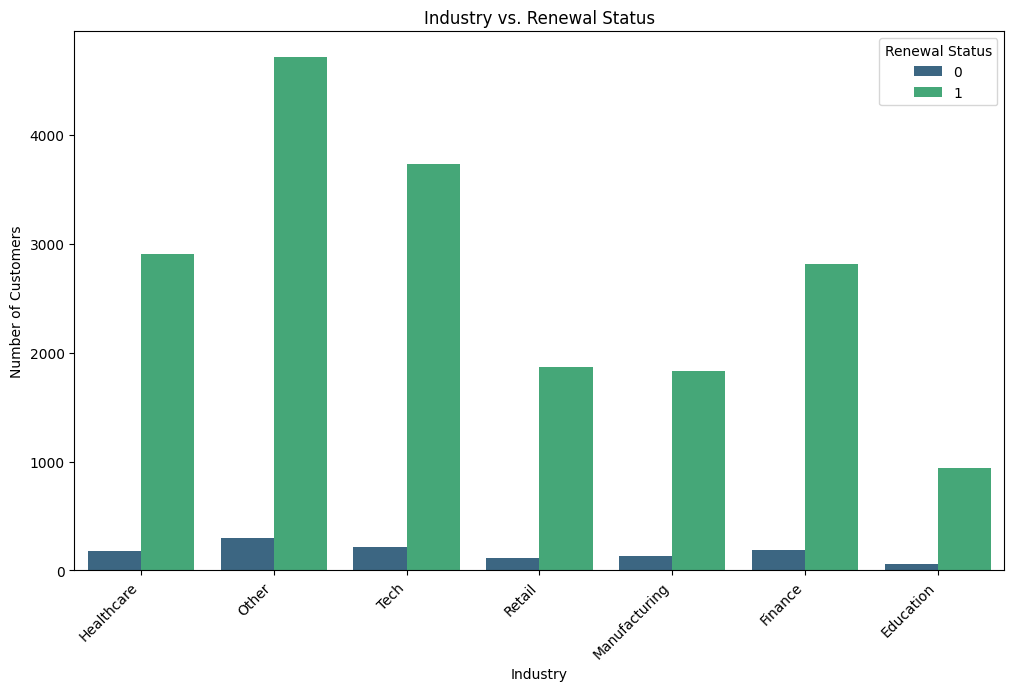


Churn Rates by Industry:
Renewal_Status  Churn_Rate
Industry                  
Manufacturing     0.065749
Finance           0.062271
Education         0.061753
Retail            0.059859
Other             0.059493
Healthcare        0.058957
Tech              0.054978


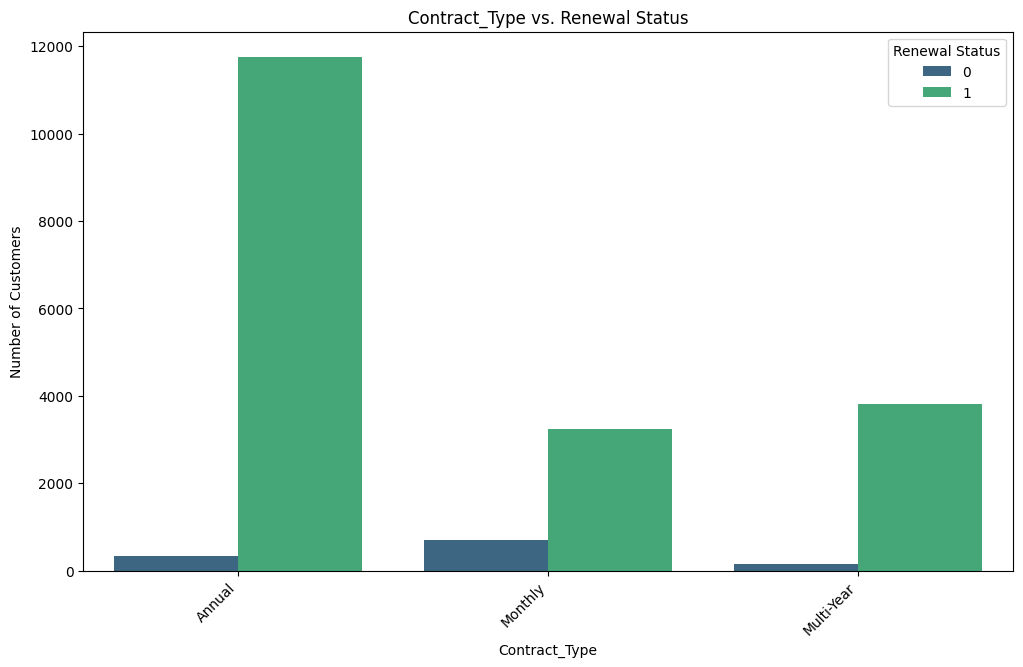


Churn Rates by Contract_Type:
Renewal_Status  Churn_Rate
Contract_Type             
Monthly           0.177575
Multi-Year        0.038752
Annual            0.028136


In [123]:
# Categorical Features Analysis
categorical_features = X.select_dtypes(include=['object']).columns
print("\n--- Categorical Feature Distributions ---")
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

print("\n--- Categorical Feature vs. Renewal Status ---")
for col in categorical_features:
    plt.figure(figsize=(12, 7))
    sns.countplot(x=col, hue='Renewal_Status', data=data, palette='viridis')
    plt.title(f'{col} vs. Renewal Status')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Renewal Status')
    plt.show()

    # Proportional view (more insightful for churn risk)
    churn_rates = data.groupby(col)['Renewal_Status'].value_counts(normalize=True).unstack()
    churn_rates['Churn_Rate'] = churn_rates[0] # Probability of churn
    print(f"\nChurn Rates by {col}:")
    print(churn_rates[['Churn_Rate']].sort_values(by='Churn_Rate', ascending=False))

**Insights from Categorical Features:**

* Industry: Will show the distribution of your customer base across
industries. Expect some industries to have higher or lower churn rates (e.g., Education might have specific churn patterns).

* Contract_Type: Distribution across Monthly, Annual, Multi-Year. Expect Monthly contracts to have significantly higher churn rates. This is a very strong predictor in real SaaS.

# **STEP 2. DATA CLEANING**

### **1. Handling Missing Value**

In [124]:
# Handling missing value using median
nps_median = X['NPS_Score_Last_Survey'].median()
X['NPS_Score_Last_Survey'].fillna(nps_median, inplace=True)

In [125]:
print("\n--- Missing Values Check ---")
X.isnull().sum()


--- Missing Values Check ---


,0
Annual_Contract_Value_USD,0
Tenure_Months,0
Industry,0
Num_Licenses,0
Avg_Daily_Active_Users_Pct,0
Key_Feature_Adoption_Score,0
Support_Tickets_Opened_90Days,0
Avg_Resolution_Time_Hours_90Days,0
CSM_Touchpoints_90Days,0
NPS_Score_Last_Survey,0


In [126]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Annual_Contract_Value_USD         20000 non-null  float64
 1   Tenure_Months                     20000 non-null  int64  
 2   Industry                          20000 non-null  object 
 3   Num_Licenses                      20000 non-null  int64  
 4   Avg_Daily_Active_Users_Pct        20000 non-null  float64
 5   Key_Feature_Adoption_Score        20000 non-null  float64
 6   Support_Tickets_Opened_90Days     20000 non-null  float64
 7   Avg_Resolution_Time_Hours_90Days  20000 non-null  float64
 8   CSM_Touchpoints_90Days            20000 non-null  float64
 9   NPS_Score_Last_Survey             20000 non-null  float64
 10  Payment_Delays_Last_Year          20000 non-null  float64
 11  Contract_Type                     20000 non-null  object 
dtypes: f

### **2. Scaling**

In [127]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical features
X[numerical_features] = scaler.fit_transform(X[numerical_features])

print("\n--- DataFrame after Standard Scaling of Numerical Features ---")
display(X.head())


--- DataFrame after Standard Scaling of Numerical Features ---


,Annual_Contract_Value_USD,Tenure_Months,Industry,Num_Licenses,Avg_Daily_Active_Users_Pct,Key_Feature_Adoption_Score,Support_Tickets_Opened_90Days,Avg_Resolution_Time_Hours_90Days,CSM_Touchpoints_90Days,NPS_Score_Last_Survey,Payment_Delays_Last_Year,Contract_Type
0,-0.800592,-0.952057,Healthcare,0.090652,-0.437325,-0.329455,-0.391078,-1.672351,0.288711,-0.337275,-0.547245,Annual
1,-0.035557,1.254545,Other,1.464357,-1.612354,-1.718615,0.526461,-1.440998,0.288711,-0.007537,-0.547245,Annual
2,-0.296715,-0.510736,Other,1.649279,-1.020310,0.281796,-0.391078,0.121965,0.288711,-0.428869,-0.547245,Annual
3,0.910279,-1.099163,Tech,-0.880188,-0.453625,0.869601,1.444001,0.394579,-0.952258,0.505388,-0.547245,Annual
4,1.515799,-0.142969,Other,1.768158,-1.574391,-0.170809,1.444001,-0.685034,0.288711,0.798488,-0.547245,Annual


In [128]:
# Convert categorical columns to numerical using one-hot encoding
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Annual_Contract_Value_USD         20000 non-null  float64
 1   Tenure_Months                     20000 non-null  float64
 2   Num_Licenses                      20000 non-null  float64
 3   Avg_Daily_Active_Users_Pct        20000 non-null  float64
 4   Key_Feature_Adoption_Score        20000 non-null  float64
 5   Support_Tickets_Opened_90Days     20000 non-null  float64
 6   Avg_Resolution_Time_Hours_90Days  20000 non-null  float64
 7   CSM_Touchpoints_90Days            20000 non-null  float64
 8   NPS_Score_Last_Survey             20000 non-null  float64
 9   Payment_Delays_Last_Year          20000 non-null  float64
 10  Industry_Finance                  20000 non-null  bool   
 11  Industry_Healthcare               20000 non-null  bool   
 12  Indu

### **3. Encoding Categorical Variables - One hot Encoding**

In [129]:
# Convert boolean columns to int (0 or 1)
for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(int)

X.head(5)

,Annual_Contract_Value_USD,Tenure_Months,Num_Licenses,Avg_Daily_Active_Users_Pct,Key_Feature_Adoption_Score,Support_Tickets_Opened_90Days,Avg_Resolution_Time_Hours_90Days,CSM_Touchpoints_90Days,NPS_Score_Last_Survey,Payment_Delays_Last_Year,Industry_Finance,Industry_Healthcare,Industry_Manufacturing,Industry_Other,Industry_Retail,Industry_Tech,Contract_Type_Monthly,Contract_Type_Multi-Year
0,-0.800592,-0.952057,0.090652,-0.437325,-0.329455,-0.391078,-1.672351,0.288711,-0.337275,-0.547245,0,1,0,0,0,0,0,0
1,-0.035557,1.254545,1.464357,-1.612354,-1.718615,0.526461,-1.440998,0.288711,-0.007537,-0.547245,0,0,0,1,0,0,0,0
2,-0.296715,-0.510736,1.649279,-1.020310,0.281796,-0.391078,0.121965,0.288711,-0.428869,-0.547245,0,0,0,1,0,0,0,0
3,0.910279,-1.099163,-0.880188,-0.453625,0.869601,1.444001,0.394579,-0.952258,0.505388,-0.547245,0,0,0,0,0,1,0,0
4,1.515799,-0.142969,1.768158,-1.574391,-0.170809,1.444001,-0.685034,0.288711,0.798488,-0.547245,0,0,0,1,0,0,0,0


In [130]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Annual_Contract_Value_USD         20000 non-null  float64
 1   Tenure_Months                     20000 non-null  float64
 2   Num_Licenses                      20000 non-null  float64
 3   Avg_Daily_Active_Users_Pct        20000 non-null  float64
 4   Key_Feature_Adoption_Score        20000 non-null  float64
 5   Support_Tickets_Opened_90Days     20000 non-null  float64
 6   Avg_Resolution_Time_Hours_90Days  20000 non-null  float64
 7   CSM_Touchpoints_90Days            20000 non-null  float64
 8   NPS_Score_Last_Survey             20000 non-null  float64
 9   Payment_Delays_Last_Year          20000 non-null  float64
 10  Industry_Finance                  20000 non-null  int64  
 11  Industry_Healthcare               20000 non-null  int64  
 12  Indu

### **4. Feature Engineering**

In [131]:
# Feature Engineering
X['Engagement_Score'] = (X['Avg_Daily_Active_Users_Pct'] * 0.6) + (X['Key_Feature_Adoption_Score'] * 0.4)
X['Support_Load_Score'] = X['Support_Tickets_Opened_90Days'] + (X['Avg_Resolution_Time_Hours_90Days'] / 24)
X['Financial_Health_Proxy'] = X['Annual_Contract_Value_USD'] / (X['Payment_Delays_Last_Year'] + 1)
X['Tenure_x_Engagement'] = X['Tenure_Months'] * X['Engagement_Score']
X['Active_Users_Count'] = np.expm1(X['Num_Licenses']) * X['Avg_Daily_Active_Users_Pct']
X['Active_Users_Count'] = X['Active_Users_Count'].clip(upper=X['Active_Users_Count'].quantile(0.99))
X['NPS_x_Support_Load'] = X['NPS_Score_Last_Survey'] * X['Support_Load_Score']
X['Tenure_Months_Sq'] = X['Tenure_Months']**2
X['Engagement_Tier'] = pd.qcut(X['Engagement_Score'], q=3, labels=['Low', 'Medium', 'High'])
X['Engagement_Tier'] = X['Engagement_Tier'].astype('object')
X.drop(columns=['Avg_Daily_Active_Users_Pct', 'Key_Feature_Adoption_Score','Annual_Contract_Value_USD','Support_Tickets_Opened_90Days'], inplace=True)


In [132]:
X.head(5)

,Tenure_Months,Num_Licenses,Avg_Resolution_Time_Hours_90Days,CSM_Touchpoints_90Days,NPS_Score_Last_Survey,Payment_Delays_Last_Year,Industry_Finance,Industry_Healthcare,Industry_Manufacturing,Industry_Other,...,Contract_Type_Monthly,Contract_Type_Multi-Year,Engagement_Score,Support_Load_Score,Financial_Health_Proxy,Tenure_x_Engagement,Active_Users_Count,NPS_x_Support_Load,Tenure_Months_Sq,Engagement_Tier
0,-0.952057,0.090652,-1.672351,0.288711,-0.337275,-0.547245,0,1,0,0,...,0,0,-0.394177,-0.460760,-1.768266,0.375279,-0.041497,0.155403,0.906412,Low
1,1.254545,1.464357,-1.440998,0.288711,-0.007537,-0.547245,0,0,0,1,...,0,0,-1.654858,0.466420,-0.078535,-2.076094,-5.360696,-0.003516,1.573883,Low
2,-0.510736,1.649279,0.121965,0.288711,-0.428869,-0.547245,0,0,0,1,...,0,0,-0.499467,-0.385996,-0.655355,0.255096,-4.288595,0.165542,0.260852,Low
3,-1.099163,-0.880188,0.394579,-0.952258,0.505388,-0.547245,0,0,0,0,...,0,0,0.075666,1.460441,2.010533,-0.083169,0.265505,0.738089,1.208160,Medium
4,-0.142969,1.768158,-0.685034,0.288711,0.798488,-0.547245,0,0,0,1,...,0,0,-1.012958,1.415458,3.347944,0.144822,-7.651616,1.130226,0.020440,Low


In [133]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to 'Engagement_Tier'
X['Engagement_Tier_Encoded'] = label_encoder.fit_transform(X['Engagement_Tier'])

# Drop the original 'Engagement_Tier' column
X = X.drop('Engagement_Tier', axis=1)

print("\n--- DataFrame after Label Encoding Engagement_Tier ---")
display(X.head())


--- DataFrame after Label Encoding Engagement_Tier ---


,Tenure_Months,Num_Licenses,Avg_Resolution_Time_Hours_90Days,CSM_Touchpoints_90Days,NPS_Score_Last_Survey,Payment_Delays_Last_Year,Industry_Finance,Industry_Healthcare,Industry_Manufacturing,Industry_Other,...,Contract_Type_Monthly,Contract_Type_Multi-Year,Engagement_Score,Support_Load_Score,Financial_Health_Proxy,Tenure_x_Engagement,Active_Users_Count,NPS_x_Support_Load,Tenure_Months_Sq,Engagement_Tier_Encoded
0,-0.952057,0.090652,-1.672351,0.288711,-0.337275,-0.547245,0,1,0,0,...,0,0,-0.394177,-0.460760,-1.768266,0.375279,-0.041497,0.155403,0.906412,1
1,1.254545,1.464357,-1.440998,0.288711,-0.007537,-0.547245,0,0,0,1,...,0,0,-1.654858,0.466420,-0.078535,-2.076094,-5.360696,-0.003516,1.573883,1
2,-0.510736,1.649279,0.121965,0.288711,-0.428869,-0.547245,0,0,0,1,...,0,0,-0.499467,-0.385996,-0.655355,0.255096,-4.288595,0.165542,0.260852,1
3,-1.099163,-0.880188,0.394579,-0.952258,0.505388,-0.547245,0,0,0,0,...,0,0,0.075666,1.460441,2.010533,-0.083169,0.265505,0.738089,1.208160,2
4,-0.142969,1.768158,-0.685034,0.288711,0.798488,-0.547245,0,0,0,1,...,0,0,-1.012958,1.415458,3.347944,0.144822,-7.651616,1.130226,0.020440,1


In [134]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Tenure_Months                     20000 non-null  float64
 1   Num_Licenses                      20000 non-null  float64
 2   Avg_Resolution_Time_Hours_90Days  20000 non-null  float64
 3   CSM_Touchpoints_90Days            20000 non-null  float64
 4   NPS_Score_Last_Survey             20000 non-null  float64
 5   Payment_Delays_Last_Year          20000 non-null  float64
 6   Industry_Finance                  20000 non-null  int64  
 7   Industry_Healthcare               20000 non-null  int64  
 8   Industry_Manufacturing            20000 non-null  int64  
 9   Industry_Other                    20000 non-null  int64  
 10  Industry_Retail                   20000 non-null  int64  
 11  Industry_Tech                     20000 non-null  int64  
 12  Cont

### **5. Correlation Check**

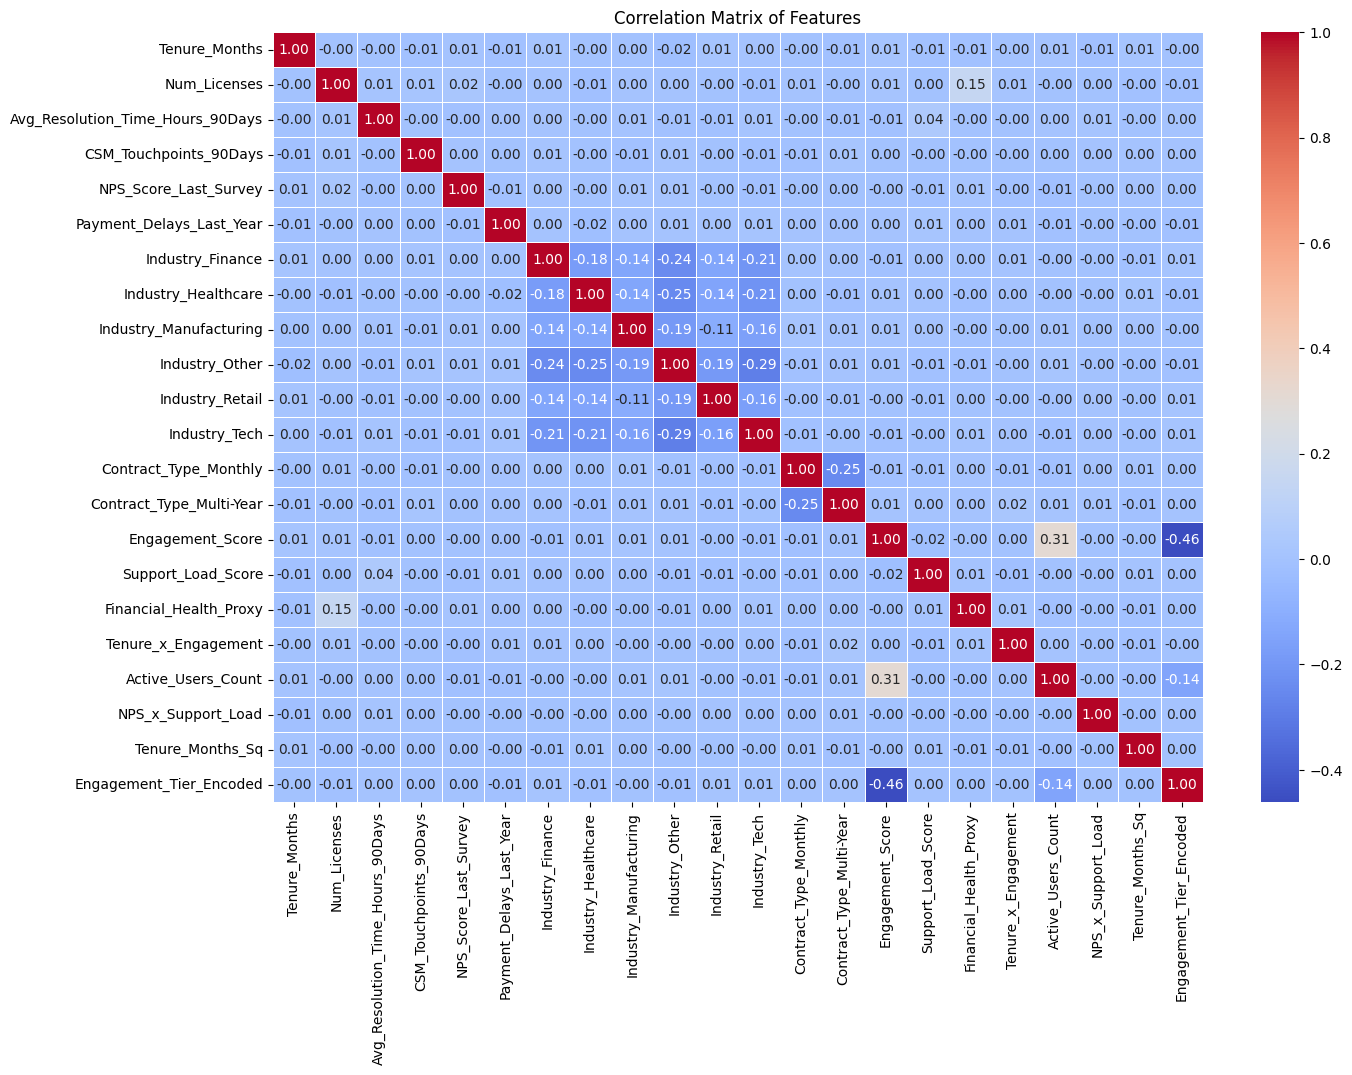

In [135]:
# Calculate the correlation matrix
corr_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [136]:
# Drop highly correlated columns (threshold = 0.8)
# We will iterate through the correlation matrix and drop one column from each pair with correlation >= 0.8
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.8)]

print(f"Columns to drop due to high multicollinearity (>= 0.8): {to_drop}")

# Drop the identified columns from the training, validation, and test sets
X = X.drop(columns=to_drop)

Columns to drop due to high multicollinearity (>= 0.8): []


# **STEP 3. Splitting dataset into Train, Validation & Test**

In [137]:
from sklearn.model_selection import train_test_split

# Split the data into training and a temporary set (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Validation set shape (X_val, y_val):", X_val.shape, y_val.shape)
print("Test set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (14000, 22) (14000,)
Validation set shape (X_val, y_val): (3000, 22) (3000,)
Test set shape (X_test, y_test): (3000, 22) (3000,)


# **STEP 4. Oversample Minority Class**

In [138]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of training data before oversampling:", X_train.shape)
print("Shape of training data after oversampling:", X_train_resampled.shape)
print("\nDistribution of the target variable before oversampling:\n", y_train.value_counts())
print("\nDistribution of the target variable after oversampling:\n", y_train_resampled.value_counts())

Shape of training data before oversampling: (14000, 22)
Shape of training data after oversampling: (26328, 22)

Distribution of the target variable before oversampling:
 Renewal_Status
1    13164
0      836
Name: count, dtype: int64

Distribution of the target variable after oversampling:
 Renewal_Status
1    13164
0    13164
Name: count, dtype: int64


In [139]:
X_train=X_train_resampled
y_train=y_train_resampled

# **STEP 5. MODEL TRAINING**

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, solver='liblinear') # Using liblinear for smaller datasets/binary
logistic_model.fit(X_train, y_train)

print("--- Logistic Regression Model Trained ---")

--- Logistic Regression Model Trained ---


# **STEP 6: Cross - Validation**

In [141]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
# Using the oversampled training data for cross-validation
cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='roc_auc') # Using ROC AUC as a relevant metric for imbalanced data

print("\n--- Cross-Validation Results (ROC AUC) ---")
print(f"ROC AUC scores for each fold: {cv_scores}")
print(f"Mean ROC AUC score: {cv_scores.mean():.4f}")
print(f"Standard deviation of ROC AUC scores: {cv_scores.std():.4f}")


--- Cross-Validation Results (ROC AUC) ---
ROC AUC scores for each fold: [0.87095729 0.92330292 0.92399068 0.91871956 0.92776004]
Mean ROC AUC score: 0.9129
Standard deviation of ROC AUC scores: 0.0212


# **STEP 7: Model Evaluation**

In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Make predictions on the validation set
 # Make predictions on the validation set using the best model
y_val_pred=logistic_model.predict(X_val)
y_val_proba = logistic_model.predict_proba(X_val)[:, 1]# Probability of the positive class (renewal = 1)


# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

print("\n--- Model Evaluation on Validation Set ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


--- Model Evaluation on Validation Set ---
Accuracy: 0.8363
Precision: 0.9664
Recall: 0.8557
F1-Score: 0.9077
ROC-AUC: 0.7932

Confusion Matrix:
[[  95   84]
 [ 407 2414]]

Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.53      0.28       179
           1       0.97      0.86      0.91      2821

    accuracy                           0.84      3000
   macro avg       0.58      0.69      0.59      3000
weighted avg       0.92      0.84      0.87      3000



*  **Accuracy (0.8380)**: This is the overall proportion of correct predictions (both renewals and churns) out of the total number of predictions. An accuracy of 83.80% means the model correctly predicted the renewal status for about 83.80% of the customers in the validation set. While seemingly high, for imbalanced datasets like this one (where most customers renew), accuracy can be misleading. A naive model that always predicts "renew" would achieve very high accuracy.
*  **Precision (0.9687)**: Precision is the proportion of correctly predicted positive instances (renewals) out of all instances predicted as positive. A precision of 96.87% means that when the model predicts a customer will renew, it is correct 96.87% of the time. This is good for minimizing "false positives" (predicting renewal when they actually churn), which is important if the cost of incorrectly offering retention incentives to a churned customer is high.
* **Recall** **(0.8554)**: Recall (also known as sensitivity or true positive rate) is the proportion of actual positive instances (renewals) that were correctly identified by the model. A recall of 85.54% means the model correctly identifies 85.54% of all customers who actually renewed. This is good for minimizing "false negatives" (failing to predict renewal when they actually renewed). The classification report also shows the recall for the churn class (0) is 0.56, meaning the model is less effective at identifying all actual churners.
*  **F1-Score (0.9085)**: The F1-Score is the harmonic mean of Precision and Recall. It provides a single score that balances both metrics. A higher F1-Score indicates a better balance between Precision and Recall. The F1-score for the positive class (1) is 0.91, while for the minority class (0) it is 0.29, which highlights the challenge of predicting churn.
*  **ROC-AUC (0.7968)**: The Receiver Operating Characteristic - Area Under the Curve (ROC-AUC) is a measure of the model's ability to distinguish between the positive and negative classes across different probability thresholds. An AUC of 0.7968 suggests that the model has a reasonably good ability to differentiate between customers who will renew and those who will churn. An AUC of 0.5 indicates a random model, while an AUC of 1.0 indicates a perfect model.
*  **Classification Report**: This provides Precision, Recall, and F1-Score for each class (0 and 1), as well as the support (number of actual instances in each class in the validation set). It clearly shows the model performs much better at predicting the majority class (1 - Renewed) than the minority class (0 - Churned), which is expected given the imbalance, even after oversampling.

**Summary**: The model has high precision for the "renewed" class, which is good for not incorrectly flagging churn risks. However, the lower recall and F1-score for the "churned" class indicate that the model is missing a significant portion of actual churners. The ROC-AUC suggests the model has some discriminatory power, but there's room for improvement in identifying the minority class. This evaluation confirms that while the model has learned something, further tuning or alternative approaches might be needed to improve the detection of churn risks.

# **STEP 8: HYPER PARAMETER TUNING**

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],             # Norm used in the penalization
    'solver': ['liblinear']              # Solver that supports l1 and l2 penalties
}

# Initialize GridSearchCV
# We use the oversampled training data for tuning
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42),
                           param_grid=param_grid,
                           scoring='roc_auc',  # Use ROC_AUC as the scoring metric
                           cv=5,               # Use 5-fold cross-validation
                           n_jobs=-1)          # Use all available cores

# Perform the grid search
grid_search.fit(X_train, y_train)

print("\n--- Hyperparameter Tuning Results ---")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC AUC score: {grid_search.best_score_:.4f}")

# Get the best model
best_logistic_model = grid_search.best_estimator_


--- Hyperparameter Tuning Results ---
Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC AUC score: 0.9130


In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Make predictions on the validation set using the best model
y_val_pred_tuned = best_logistic_model.predict(X_val)
y_val_proba_tuned = best_logistic_model.predict_proba(X_val)[:, 1] # Probability of the positive class (renewal = 1)

# Evaluate the best model
accuracy_tuned = accuracy_score(y_val, y_val_pred_tuned)
precision_tuned = precision_score(y_val, y_val_pred_tuned)
recall_tuned = recall_score(y_val, y_val_pred_tuned)
f1_tuned = f1_score(y_val, y_val_pred_tuned)
roc_auc_tuned = roc_auc_score(y_val, y_val_proba_tuned)
conf_matrix_tuned = confusion_matrix(y_val, y_val_pred_tuned)
class_report_tuned = classification_report(y_val, y_val_pred_tuned)

print("\n--- Model Evaluation on Validation Set (After Hyperparameter Tuning) ---")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1-Score: {f1_tuned:.4f}")
print(f"ROC-AUC: {roc_auc_tuned:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix_tuned)

print("\nClassification Report:")
print(class_report_tuned)


--- Model Evaluation on Validation Set (After Hyperparameter Tuning) ---
Accuracy: 0.8357
Precision: 0.9660
Recall: 0.8554
F1-Score: 0.9073
ROC-AUC: 0.7927

Confusion Matrix:
[[  94   85]
 [ 408 2413]]

Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.53      0.28       179
           1       0.97      0.86      0.91      2821

    accuracy                           0.84      3000
   macro avg       0.58      0.69      0.59      3000
weighted avg       0.92      0.84      0.87      3000



In [145]:
# Get the coefficients of the best Logistic Regression model
coefficients = best_logistic_model.coef_[0]

# Get the feature names
feature_names = X_train.columns

# Create a DataFrame to display coefficients and feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of coefficients to see the most influential features
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print("\n--- Logistic Regression Model Coefficients (Sorted by Absolute Value) ---")
display(coef_df)


--- Logistic Regression Model Coefficients (Sorted by Absolute Value) ---


,Feature,Coefficient,Abs_Coefficient
10,Industry_Retail,4.189967,4.189967
8,Industry_Manufacturing,3.543371,3.543371
7,Industry_Healthcare,3.499949,3.499949
11,Industry_Tech,3.487057,3.487057
6,Industry_Finance,3.362719,3.362719
9,Industry_Other,3.290465,3.290465
12,Contract_Type_Monthly,-1.503212,1.503212
13,Contract_Type_Multi-Year,1.076962,1.076962
14,Engagement_Score,0.966576,0.966576
16,Financial_Health_Proxy,0.426109,0.426109


In [146]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Make predictions on the test set using the best model
y_test_pred = best_logistic_model.predict(X_test)
y_test_proba = best_logistic_model.predict_proba(X_test)[:, 1] # Probability of the positive class (renewal = 1)

# Evaluate the best model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_proba)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)

print("\n--- Model Evaluation on Test Set ---")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")
print(f"ROC-AUC: {roc_auc_test:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix_test)

print("\nClassification Report:")
print(class_report_test)


--- Model Evaluation on Test Set ---
Accuracy: 0.8380
Precision: 0.9661
Recall: 0.8579
F1-Score: 0.9087
ROC-AUC: 0.7959

Confusion Matrix:
[[  94   85]
 [ 401 2420]]

Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.53      0.28       179
           1       0.97      0.86      0.91      2821

    accuracy                           0.84      3000
   macro avg       0.58      0.69      0.59      3000
weighted avg       0.92      0.84      0.87      3000



**Conclusion:**

Since the performance metrics on the test set are very close to those on the validation set, it suggests that the model is not significantly overfitting to the validation data. The model's performance generalizes well to unseen data (the test set).

There doesn't appear to be underfitting either, as the model achieves reasonable (though not perfect, especially for the minority class) performance on both sets. Underfitting would typically manifest as poor performance on both the training and test/validation sets.

The consistency between the validation and test results indicates that our evaluation on the validation set was a good indicator of how the model would perform on new, unseen data.



In [152]:
X_test.head(1)

,Tenure_Months,Num_Licenses,Avg_Resolution_Time_Hours_90Days,CSM_Touchpoints_90Days,NPS_Score_Last_Survey,Payment_Delays_Last_Year,Industry_Finance,Industry_Healthcare,Industry_Manufacturing,Industry_Other,...,Contract_Type_Monthly,Contract_Type_Multi-Year,Engagement_Score,Support_Load_Score,Financial_Health_Proxy,Tenure_x_Engagement,Active_Users_Count,NPS_x_Support_Load,Tenure_Months_Sq,Engagement_Tier_Encoded
12692,0.739671,1.160557,-1.336463,0.288711,-1.821094,-0.547245,0,0,0,0,...,0,0,0.311115,-0.446764,-2.043773,0.230123,1.989146,0.8136,0.547113,2


In [153]:
import pandas as pd
import numpy as np


sample_new_data_processed = X_test.head(1)

print("--- Sample Processed Data Row from X_test ---")
display(sample_new_data_processed)

# 3. Predict the renewal likelihood score
# The model.predict_proba returns probabilities for both classes [prob_churn, prob_renewal]
# We want the probability of renewal (class 1)
renewal_likelihood_score = best_logistic_model.predict_proba(sample_new_data_processed)[:, 1]

print(f"\nPredicted Renewal Likelihood Score: {renewal_likelihood_score[0]:.4f}")

# Predict the class (0 for churn, 1 for renewal)
predicted_class = best_logistic_model.predict(sample_new_data_processed)[0]
print(f"Predicted Class (0=Churn, 1=Renewal): {predicted_class}")


--- Sample Processed Data Row from X_test ---


,Tenure_Months,Num_Licenses,Avg_Resolution_Time_Hours_90Days,CSM_Touchpoints_90Days,NPS_Score_Last_Survey,Payment_Delays_Last_Year,Industry_Finance,Industry_Healthcare,Industry_Manufacturing,Industry_Other,...,Contract_Type_Monthly,Contract_Type_Multi-Year,Engagement_Score,Support_Load_Score,Financial_Health_Proxy,Tenure_x_Engagement,Active_Users_Count,NPS_x_Support_Load,Tenure_Months_Sq,Engagement_Tier_Encoded
12692,0.739671,1.160557,-1.336463,0.288711,-1.821094,-0.547245,0,0,0,0,...,0,0,0.311115,-0.446764,-2.043773,0.230123,1.989146,0.8136,0.547113,2



Predicted Renewal Likelihood Score: 0.8876
Predicted Class (0=Churn, 1=Renewal): 1


In [157]:
y_test.loc[12692]

np.int64(1)

In [162]:
# Find the index of the first occurrence of a churned customer (0) in y_test
churn_index = y_test[y_test == 0].index[0]

# Get the corresponding row from X_test using the found index
X_test_churn_row = X_test.loc[[churn_index]]

display(X_test_churn_row)

print(f"\nActual Renewal Status for Index {churn_index}: {y_test.loc[churn_index]}")

,Tenure_Months,Num_Licenses,Avg_Resolution_Time_Hours_90Days,CSM_Touchpoints_90Days,NPS_Score_Last_Survey,Payment_Delays_Last_Year,Industry_Finance,Industry_Healthcare,Industry_Manufacturing,Industry_Other,...,Contract_Type_Monthly,Contract_Type_Multi-Year,Engagement_Score,Support_Load_Score,Financial_Health_Proxy,Tenure_x_Engagement,Active_Users_Count,NPS_x_Support_Load,Tenure_Months_Sq,Engagement_Tier_Encoded
5635,-1.393377,1.69551,1.184991,0.288711,-1.418081,-0.547245,1,0,0,0,...,0,0,-1.356169,1.493375,-1.89421,1.889654,-6.277421,-2.117728,1.941499,1



Actual Renewal Status for Index 5635: 0


In [163]:
sample_new_data_processed = X_test.loc[[churn_index]]

print("--- Sample Processed Data Row from X_test ---")
display(sample_new_data_processed)

# 3. Predict the renewal likelihood score
# The model.predict_proba returns probabilities for both classes [prob_churn, prob_renewal]
# We want the probability of renewal (class 1)
renewal_likelihood_score = best_logistic_model.predict_proba(sample_new_data_processed)[:, 1]

print(f"\nPredicted Renewal Likelihood Score: {renewal_likelihood_score[0]:.4f}")

# Predict the class (0 for churn, 1 for renewal)
predicted_class = best_logistic_model.predict(sample_new_data_processed)[0]
print(f"Predicted Class (0=Churn, 1=Renewal): {predicted_class}")

--- Sample Processed Data Row from X_test ---


,Tenure_Months,Num_Licenses,Avg_Resolution_Time_Hours_90Days,CSM_Touchpoints_90Days,NPS_Score_Last_Survey,Payment_Delays_Last_Year,Industry_Finance,Industry_Healthcare,Industry_Manufacturing,Industry_Other,...,Contract_Type_Monthly,Contract_Type_Multi-Year,Engagement_Score,Support_Load_Score,Financial_Health_Proxy,Tenure_x_Engagement,Active_Users_Count,NPS_x_Support_Load,Tenure_Months_Sq,Engagement_Tier_Encoded
5635,-1.393377,1.69551,1.184991,0.288711,-1.418081,-0.547245,1,0,0,0,...,0,0,-1.356169,1.493375,-1.89421,1.889654,-6.277421,-2.117728,1.941499,1



Predicted Renewal Likelihood Score: 0.1534
Predicted Class (0=Churn, 1=Renewal): 0


In [164]:
!pip install shap

In [165]:
import shap

explainer = shap.LinearExplainer(best_logistic_model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

print("\n--- SHAP values calculated ---")
print(f"Shape of SHAP values: {shap_values.shape}")


--- SHAP values calculated ---
Shape of SHAP values: (3000, 22)


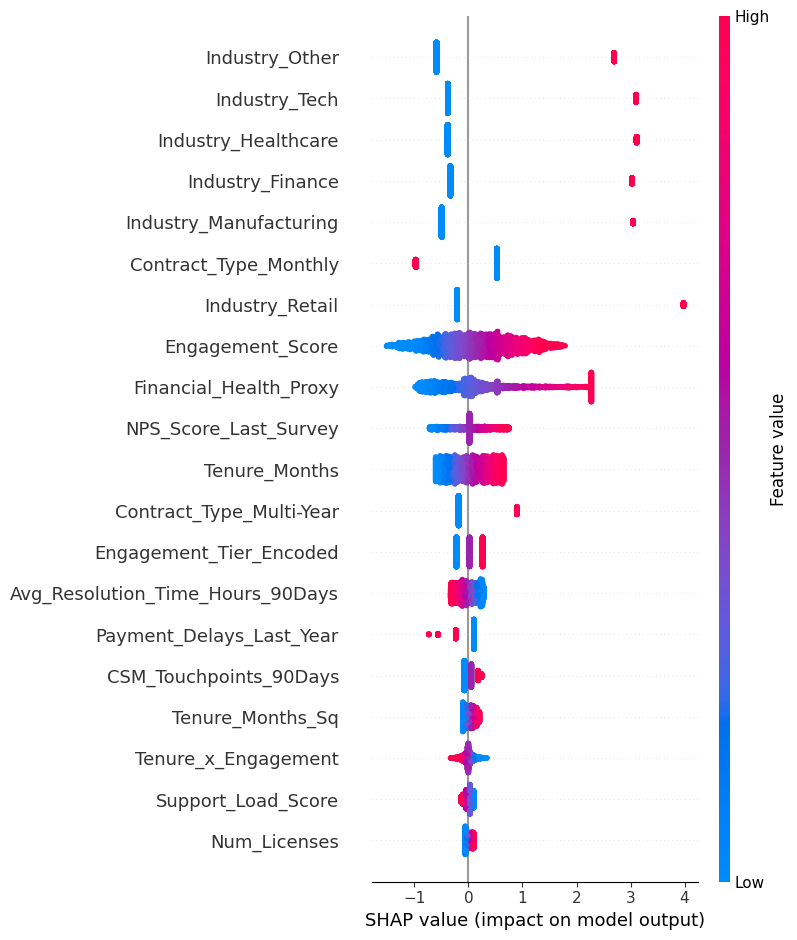


--- SHAP Summary Plot Generated ---


In [166]:
# Generate a SHAP summary plot
# This plot shows the importance of each feature and the impact of its values
shap.summary_plot(shap_values, X_test)

print("\n--- SHAP Summary Plot Generated ---")

## **Summary of SHAP Plot:**

*  **Industry_features** (Retail, Manufacturing, Healthcare, Tech, Finance, Other): These are at the very top, indicating they are the most influential features. The colors (likely representing different industries after one-hot encoding) show how being in a particular industry impacts the renewal likelihood. The exact interpretation depends on which industry corresponds to which color and which side of the SHAP value axis it falls on. However, the high importance means the industry is a strong predictor.
*  **Contract_Type_Monthly**: This feature is also very important. Points (likely red, indicating Contract_Type_Monthly is 1) mostly on the negative side of the SHAP value axis. This strongly suggests that having a monthly contract significantly decreases the predicted likelihood of renewal. This aligns perfectly with our EDA insights.
* **Contract_Type_Multi-Year**: This is also important. Points (likely red, indicating Contract_Type_Multi-Year is 1) mostly on the positive side of the SHAP value axis. This suggests that having a multi-year contract significantly increases the predicted likelihood of renewal.
* **Engagement_Score**: This feature is also important. We can see a pattern where red points (high engagement score) are on the positive side and blue points (low engagement score) are on the negative side. This indicates that higher engagement scores increase the predicted likelihood of renewal, while lower scores decrease it. This is a crucial insight for customer success.
* **Financial_Health_Proxy**: This engineered feature is also influential.
*  **NPS_Score_Last_Survey**: As expected from domain knowledge, the NPS score is important. Higher NPS (likely red) should correspond to positive SHAP values, increasing renewal likelihood.
*  **Tenure_Months**: Customer tenure also plays a role, with longer tenure (likely red) likely contributing positively to renewal likelihood.

In **summary**, SHAP plot confirms and quantifies the impact of features identified in our EDA and domain knowledge. It highlights that Industry, Contract Type (especially Monthly vs. Multi-Year), Engagement Score, and NPS Score are among the strongest drivers of your Logistic Regression model's renewal predictions. Importantly, it clearly shows the negative impact of monthly contracts and low engagement on renewal likelihood.



# **Conclusion**:
The fact that hyperparameter tuning had minimal effect is a strong signal that we've reached the performance ceiling for this class of models, and it's time to try something  different.                   

 **Note:** This project I had aimed to build a model only using logistic regression as a practice.

 **Next Step:** Using different models like Random forest to improve churn prediction score.
 **Random Forest** offers a more flexible approach that can potentially capture more complex patterns in the data and might yield better predictive performance, especially in identifying the minority class (churn), compared to a purely linear model like Logistic Regression.